# IMPORT

In [177]:
import pandas as pd
import numpy as np
import networkx as nx
import warnings
import calendar
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Rectangle
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Load Dataset

In [178]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("muhammadehsan02/us-stock-market-and-commodities-data-2020-2024")

# print("Path to dataset files:", path)

In [179]:
df = pd.read_csv('/home/muhammad-rafif-rizqullah/Documents/Belajar/Portofolio/data_analyst/Us_stock_commodity_analyst/US_stock_commodity/US_Stock_Data.csv')
df.describe()

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1013.000000        1013.000000       1009.000000      1013.000000   
mean    506.000000           3.726667     129091.932607        69.853475   
std     292.572213           1.943030      64035.426727        21.986697   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     253.000000           2.447000      88680.000000        54.760000   
50%     506.000000           2.880000     125980.000000        72.910000   
75%     759.000000           4.805000     164810.000000        82.810000   
max    1012.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    9.900000e+02   1013.000000     976.000000  1.013000e+03   
mean     3.571739e+05      3.726843   37606.752049  4.924137e+07   
std      1.864309e+05      0.646524   39192.315092  3.251389e+08   
min      1.702000e+04      2.100500      10.000000  2.600000e+02   
25%      2.751800e+05      3.408000     380.000000  7.142000e+04   
50%      3.450350e+05      3.800500   31635.000000  1.288800e+05   
75%      4.269225e+05      4.251500   70982.500000  3.860000e+05   
max      1.770000e+06      4.937500  176040.000000  4.470000e+09   

       Platinum_Vol.  Ethereum_Vol.  Nasdaq_100_Vol.  Apple_Price  \
count     636.000000   1.013000e+03     1.012000e+03  1013.000000   
mean     9082.515723   1.958002e+07     2.359978e+08   141.964462   
std      8876.538587   1.469409e+08     8.363617e+07    33.778785   
min         0.000000   7.518000e+04     6.857000e+07    56.090000   
25%      1120.000000   5.272300e+05     1.845550e+08   124.610000   
50%      6070.000000   9.665800e+05     2.239500e+08   146.500000   
75%     15287.500000   3.670000e+06     2.646375e+08   168.640000   
max     42830.000000   1.790000e+09     9.825600e+08   198.110000   

         Apple_Vol.  Tesla_Price    Tesla_Vol.  Microsoft_Price  \
count  1.013000e+03  1013.000000  1.013000e+03      1013.000000   
mean   9.789383e+07   208.928263  1.330475e+08       265.838855   
std    5.449910e+07    84.917541  8.782393e+07        57.493641   
min    2.404000e+07    24.080000  2.940000e+07       135.420000   
25%    6.235000e+07   160.950000  7.886000e+07       223.290000   
50%    8.347000e+07   222.640000  1.070900e+08       260.790000   
75%    1.150900e+08   261.160000  1.569500e+08       308.650000   
max    4.268800e+08   409.970000  9.140800e+08       411.220000   

       Microsoft_Vol.  Silver_Price    Silver_Vol.  Google_Price  \
count    1.013000e+03   1013.000000     967.000000   1013.000000   
mean     3.044173e+07     22.795356   64216.804550    108.659882   
std      1.296626e+07      3.170649   38330.214569     25.438302   
min      9.200000e+06     11.772000       0.000000     52.710000   
25%      2.230000e+07     21.327000   46275.000000     88.130000   
50%      2.702000e+07     23.383000   59540.000000    111.450000   
75%      3.431000e+07     24.949000   75705.000000    131.910000   
max      9.707000e+07     29.418000  355280.000000    153.510000   

        Google_Vol.  Nvidia_Price   Nvidia_Vol.  Berkshire_Vol.  \
count  1.013000e+03   1013.000000  1.013000e+03     1013.000000   
mean   3.428595e+07    219.738065  4.629821e+07     2918.400790   
std    1.502695e+07    128.668703  1.878815e+07     2715.637488   
min    9.310000e+06     49.100000  9.790000e+06      120.000000   
25%    2.471000e+07    131.980000  3.348000e+07      760.000000   
50%    3.055000e+07    179.130000  4.368000e+07     2040.000000   
75%    3.870000e+07    272.470000  5.640000e+07     4090.000000   
max    1.232000e+08    661.600000  1.534600e+08    13850.000000   

       Netflix_Price  Netflix_Vol.  Amazon_Price   Amazon_Vol.   Meta_Price  \
count    1013.000000  1.013000e+03   1013.000000  1.013000e+03  1013.000000   
mean      422.035479  7.012043e+06    137.426209  7.452566e+07   252.151046   
std       119.765870  6.788094

# Preprocessing

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1013 non-null   int64  
 1   Date               1013 non-null   object 
 2   Natural_Gas_Price  1013 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1013 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1013 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1013 non-null   object 
 9   Bitcoin_Vol.       1013 non-null   int64  
 10  Platinum_Price     1013 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1013 non-null   object 
 13  Ethereum_Vol.      1013 non-null   int64  
 14  S&P_500_Price      1013 non-null   object 
 15  Nasdaq_100_Price   1013 non-null   object 
 16  Nasdaq_100_Vol.    1012 

In [181]:
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

In [182]:
null_col = df.columns[df.isnull().sum() > 0]
null_col

Index(['Natural_Gas_Vol.', 'Crude_oil_Vol.', 'Copper_Vol.', 'Platinum_Vol.',
       'Nasdaq_100_Vol.', 'Silver_Vol.', 'Gold_Vol.'],
      dtype='object')

In [183]:
for col in null_col:
    df[col] = df[col].fillna(df[col].mean())

In [184]:
to_float = df.select_dtypes(include=['object'])
to_float.columns

Index(['Bitcoin_Price', 'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price',
       'Nasdaq_100_Price', 'Berkshire_Price', 'Gold_Price'],
      dtype='object')

In [185]:
for col in to_float:
    try:
        df[col] = df[col].astype('float64')
    except :
        df[col] = df[col].str.replace(',','').astype('float64')

In [186]:
pd.set_option('display.max_columns', None)

In [187]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

Date  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0 2024-02-02              2.079     129091.932607            72.28   
1 2024-01-02              2.050     161340.000000            73.82   
2 2024-01-31              2.100     142860.000000            75.85   
3 2024-01-30              2.077     139750.000000            77.82   
4 2024-01-29              2.490       3590.000000            76.78   

   Crude_oil_Vol.  Copper_Price   Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  \
0   357173.919192        3.8215  37606.752049        43194.7         42650   
1   577940.000000        3.8535  37606.752049        43081.4         47690   
2   344490.000000        3.9060  37606.752049        42580.5         56480   
3   347240.000000        3.9110  37606.752049        42946.2         55130   
4   331930.000000        3.8790  37606.752049        43299.8         45230   

   Platinum_Price  Platinum_Vol.  Ethereum_Price  Ethereum_Vol.  \
0           901.6    9082.515723         2309.28         246890   
1           922.3    9082.515723         2304.28         323610   
2           932.6    9082.515723         2283.14         408790   
3           931.7    9082.515723         2343.11         387120   
4           938.3    9082.515723         2317.79         318840   

   S&P_500_Price  Nasdaq_100_Price  Nasdaq_100_Vol.  Apple_Price  Apple_Vol.  \
0        4958.61          17642.73      315620000.0       185.85   102550000   
1        4906.19          17344.71      240640000.0       186.86    53490000   
2        4848.87          17137.24      366450000.0       184.40    54830000   
3        4924.97          17476.71      236210000.0       188.04    55270000   
4        4927.93          17596.27      238750000.0       191.73    46890000   

   Tesla_Price  Tesla_Vol.  Microsoft_Price  Microsoft_Vol.  Silver_Price  \
0       187.91   110610000           411.22        28260000        22.796   
1       188.86    90680000           403.78        29230000        23.236   
2       187.29   102270000           397.58        46780000        23.169   
3       191.59   105540000           408.59        29340000        23.225   
4       190.93   123600000           409.72        23290000        23.134   

   Silver_Vol.  Google_Price  Google_Vol.  Nvidia_Price  Nvidia_Vol.  \
0  64216.80455        142.38     62500000        661.60     47660000   
1  85160.00000        141.16     37120000        630.27     36020000   
2  66910.00000        140.10     71370000        615.27     45070000   
3  53370.00000        151.46     33060000        627.74     39600000   
4    330.00000        153.51     27590000        624.65     33900000   

   Berkshire_Price  Berkshire_Vol.  Netflix_Price  Netflix_Vol.  Amazon_Price  \
0         589498.0           10580         564.64       4030000        171.81   
1         581600.0            9780         567.51       3150000        159.28   
2         578020.0            9720         564.11       4830000        155.20   
3         584680.0            9750         562.85       6120000        159.00   
4         578800.0           13850         575.79       6880000        161.26   

   Amazon_Vol.  Meta_Price  Meta_Vol.  Gold_Price     Gold_Vol.  
0    117220000      474.99   84710000      2053.7  189442.39367  
1     66360000      394.78   25140000      2071.1  260920.00000  
2     49690000      390.14   20010000      2067.4  238370.00000  
3     42290000      400.06   18610000      2050.9  214590.00000  
4     42840000      401.02   17790000      2034.9    1780.00000

# Correlation

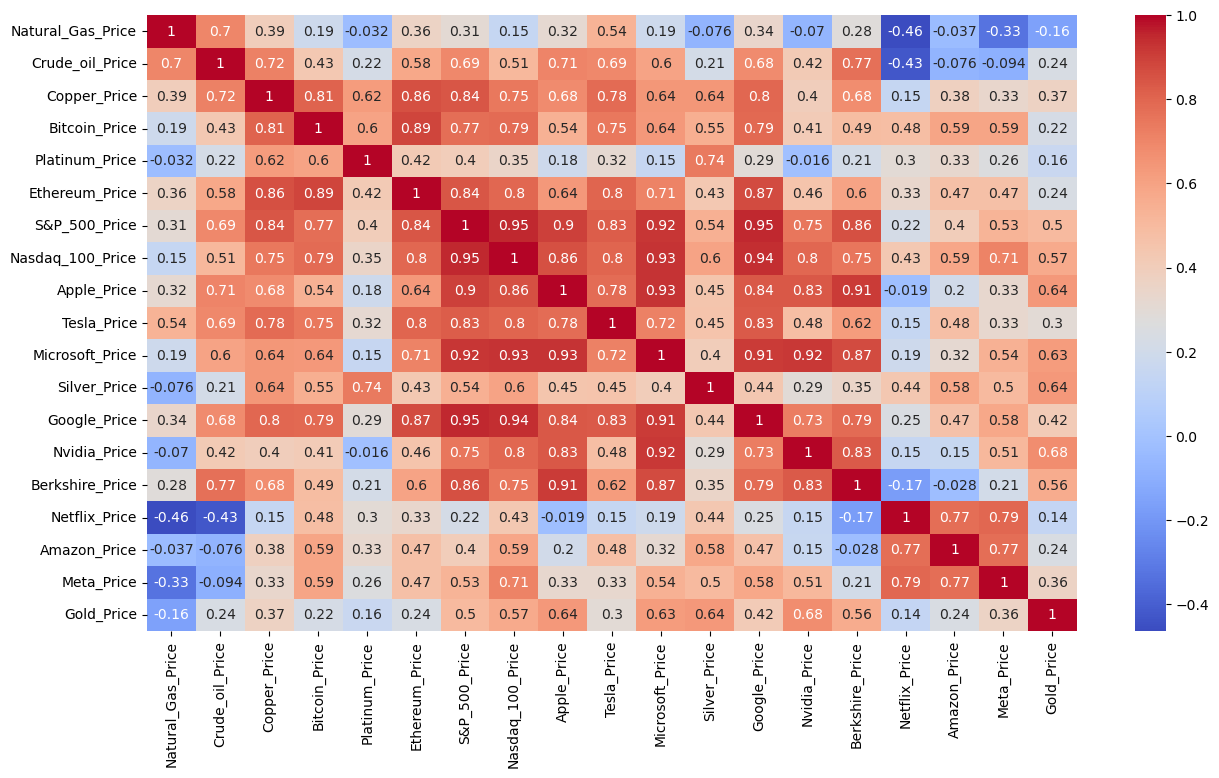

In [188]:
price_columns = [col for col in df.columns if 'Price' in col]

corr_price = df[price_columns].corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr_price, cmap='coolwarm', annot=True)
plt.show()

In [189]:
correlation = []
for target in price_columns :
    for col in price_columns:
         if col != target:
             corr_value = df[target].corr(df[col])

             if abs(corr_value) > 0.5:
                 correlation.append({
                     'Target' : target,
                     'Fitur' : col,
                     'Korelasi': corr_value
                 })
corr_df = pd.DataFrame(correlation)
corr_df = corr_df.sort_values('Korelasi', ascending=False)


In [190]:
df = df.set_index('Date')

In [191]:
pd.set_option('display.max_rows', None)
df = df.sort_index()
df = df[df.index.year != 2024]
norm_df = df[price_columns]

In [192]:
norm_df.tail()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2023-12-22              2.610            73.56        3.9050        43968.9   
2023-12-26              2.550            75.57        3.9020        42513.3   
2023-12-27              2.619            74.11        3.9560        43446.5   
2023-12-28              2.557            71.77        3.9245        42581.1   
2023-12-29              2.514            71.65        3.8915        42072.4   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2023-12-22           981.8         2324.23        4754.63          16777.40   
2023-12-26           995.6         2230.74        4774.75          16878.46   
2023-12-27          1013.5         2378.63        4781.58          16906.80   
2023-12-28          1023.2         2344.47        4783.35          16898.47   
2023-12-29          1009.2         2299.24        4769.83          16825.93   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2023-12-22       193.60       252.54           374.58        24.565   
2023-12-26       193.05       256.61           374.66        24.396   
2023-12-27       193.15       261.44           374.07        24.570   
2023-12-28       193.58       253.18           375.28        24.372   
2023-12-29       192.53       248.48           376.04        24.025   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2023-12-22        141.49        488.30         542600.0         486.76   
2023-12-26        141.52        492.79         543635.0         491.19   
2023-12-27        140.37        494.17         543750.0         491.79   
2023-12-28        140.23        495.22         545000.0         490.51   
2023-12-29        139.69        495.22         542625.0         486.88   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2023-12-22        153.42      353.39      2059.6  
2023-12-26        153.41      354.83      2060.4  
2023-12-27        153.34      357.83      2083.4  
2023-12-28        153.38      358.32      2083.5  
2023-12-29        151.94      353.96      2071.8

In [250]:
for column in norm_df[price_columns]:
    if column in norm_df.columns:
        first = norm_df[column].dropna().iloc[0]
        norm_df[column] = (norm_df[column] / first) * 100
        norm_df[column] = norm_df[column].rolling(window=7, min_periods=1).mean()

norm_df.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-04         100.000000       100.000000    100.000000     100.000000   
2020-01-05         104.773157        99.347612    101.525929     108.221360   
2020-01-06         106.612756       107.552383    103.220132     115.077954   
2020-01-07         107.220122       116.160963    105.246099     119.146550   
2020-01-09         109.592102       124.068111    107.557136     123.512887   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-04      100.000000      100.000000     100.000000        100.000000   
2020-01-05      102.068558      114.068259     103.645112        104.113820   
2020-01-06      105.098194      124.830049     106.682206        107.706421   
2020-01-07      106.935608      131.703954     109.036143        110.903724   
2020-01-09      108.887939      143.764460     111.514606        114.570479   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-04   100.000000   100.000000       100.000000    100.000000   
2020-01-05   104.997510   111.409657       103.691408    101.705521   
2020-01-06   109.284779   122.289720       106.345554    105.743071   
2020-01-07   113.508288   133.259346       109.105116    108.790552   
2020-01-09   119.906414   152.926480       112.041965    114.095371   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-04    100.000000    100.000000       100.000000     100.000000   
2020-01-05    104.886570    104.080961       101.217703     103.515024   
2020-01-06    108.785037    109.524071       101.963317     105.792836   
2020-01-07    111.626210    114.521282       102.258254     108.371729   
2020-01-09    114.532184    121.436345       103.322928     111.389319   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-04    100.000000  100.000000  100.000000  
2020-01-05    104.955970  106.683897  101.720183  
2020-01-06    108.786735  112.460666  103.020750  
2020-01-07    112.855121  116.900715  104.059973  
2020-01-09    117.630360  121.760422  105.370387

In [251]:
norm_df.describe()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
count         990.000000       990.000000    990.000000     990.000000   
mean          235.619476       340.040587    169.869848     427.396337   
std           111.083776       104.145054     27.962634     207.889229   
min           100.000000        99.347612    100.000000     100.000000   
25%           156.973175       240.086458    147.199567     257.691536   
50%           188.186155       364.435183    175.590266     412.333850   
75%           302.303988       411.328750    194.573827     584.287965   
max           507.275482       524.422640    208.694137     861.635847   

       Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
count      990.000000      990.000000     990.000000        990.000000   
mean       135.933602     1241.133351     159.416871        170.986559   
std         11.875680      720.459887      19.504997         25.152796   
min        100.000000      100.000000     100.000000        100.000000   
25%        128.484564      360.401924     141.878267        155.912578   
50%        133.403130     1286.987514     165.517655        175.112123   
75%        141.764921     1759.977315     174.687118        191.892994   
max        164.343723     2763.949931     183.604397        209.980897   

       Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  Google_Price  \
count   990.000000   990.000000       990.000000    990.000000    990.000000   
mean    230.750851   640.507001       170.704684    162.156608    193.613045   
std      51.329186   240.287898        31.311109     17.437874     40.263676   
min     100.000000   100.000000       100.000000    100.000000    100.000000   
25%     190.575413   489.926940       137.498850    149.810149    150.950264   
50%     242.869714   716.465139       174.401373    166.609458    204.405410   
75%     268.739277   804.959613       192.454239    172.423756    226.377085   
max     310.831970  1009.575731       235.621308    190.327619    249.477055   

       Nvidia_Price  Berkshire_Price  Netflix_Price  Amazon_Price  Meta_Price  \
count    990.000000       990.000000     990.000000    990.000000  990.000000   
mean     337.072658       159.738545     115.092813    143.108990  154.851624   
std      165.870402        29.517192      28.421358     23.053315   35.757361   
min      100.000000       100.000000      59.072941    100.000000   84.255102   
25%      203.971512       126.661074      95.983709    124.642957  127.063045   
50%      294.353456       163.496573     114.217859    137.032708  155.881624   
75%      400.007993       183.567427     139.995193    163.989562  182.971685   
max      749.446234       205.902602     172.271374    183.175785  220.994092   

       Gold_Price  
count  990.000000  
mean   114.893992  
std      5.343534  
min    100.000000  
25%    111.855345  
50%    114.157660  
75%    118.938207  
max    125.823893

In [252]:

norm_df = norm_df.dropna()

norm_df.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-04         100.000000       100.000000    100.000000     100.000000   
2020-01-05         104.773157        99.347612    101.525929     108.221360   
2020-01-06         106.612756       107.552383    103.220132     115.077954   
2020-01-07         107.220122       116.160963    105.246099     119.146550   
2020-01-09         109.592102       124.068111    107.557136     123.512887   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-04      100.000000      100.000000     100.000000        100.000000   
2020-01-05      102.068558      114.068259     103.645112        104.113820   
2020-01-06      105.098194      124.830049     106.682206        107.706421   
2020-01-07      106.935608      131.703954     109.036143        110.903724   
2020-01-09      108.887939      143.764460     111.514606        114.570479   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-04   100.000000   100.000000       100.000000    100.000000   
2020-01-05   104.997510   111.409657       103.691408    101.705521   
2020-01-06   109.284779   122.289720       106.345554    105.743071   
2020-01-07   113.508288   133.259346       109.105116    108.790552   
2020-01-09   119.906414   152.926480       112.041965    114.095371   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-04    100.000000    100.000000       100.000000     100.000000   
2020-01-05    104.886570    104.080961       101.217703     103.515024   
2020-01-06    108.785037    109.524071       101.963317     105.792836   
2020-01-07    111.626210    114.521282       102.258254     108.371729   
2020-01-09    114.532184    121.436345       103.322928     111.389319   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-04    100.000000  100.000000  100.000000  
2020-01-05    104.955970  106.683897  101.720183  
2020-01-06    108.786735  112.460666  103.020750  
2020-01-07    112.855121  116.900715  104.059973  
2020-01-09    117.630360  121.760422  105.370387

In [253]:
norm_df.columns

Index(['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
       'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price',
       'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
       'Amazon_Price', 'Meta_Price', 'Gold_Price'],
      dtype='object')

# EDA Musiman

In [254]:
colorsbrand_colors = {
    'Apple_Price': '#A2AAAD',      # Apple gray
    'Tesla_Price': '#CC0000',       # Tesla red
    'Microsoft_Price': '#00A1F1',   # Microsoft blue
    'Google_Price': '#4285F4',      # Google blue
    'Nvidia_Price': '#76B900',      # Nvidia green
    'Netflix_Price': '#E50914',     # Netflix red
    'Amazon_Price': '#FF9900',      # Amazon orange
    'Meta_Price': '#1877F2',        # Meta blue
    'Bitcoin_Price': '#F7931A',     # Bitcoin orange
    'Ethereum_Price': '#627EEA',    # Ethereum blue
    'Gold_Price': "#ECC902DA",        # Gold
    'Silver_Price': '#C0C0C0',      # Silver
    'Copper_Price': '#B87333',      # Copper
    'Platinum_Price': '#E5E4E2',    # Platinum
    'Crude_oil_Price': '#2F4F4F',   # Dark slate gray
    'Natural_Gas_Price': '#8B4513', # Saddle brown
    'S&P_500_Price': '#1f77b4',     # Blue
    'Nasdaq_100_Price': '#ff7f0e',  # Orange
    'Berkshire_Price': '#004225'    # Dark green
}

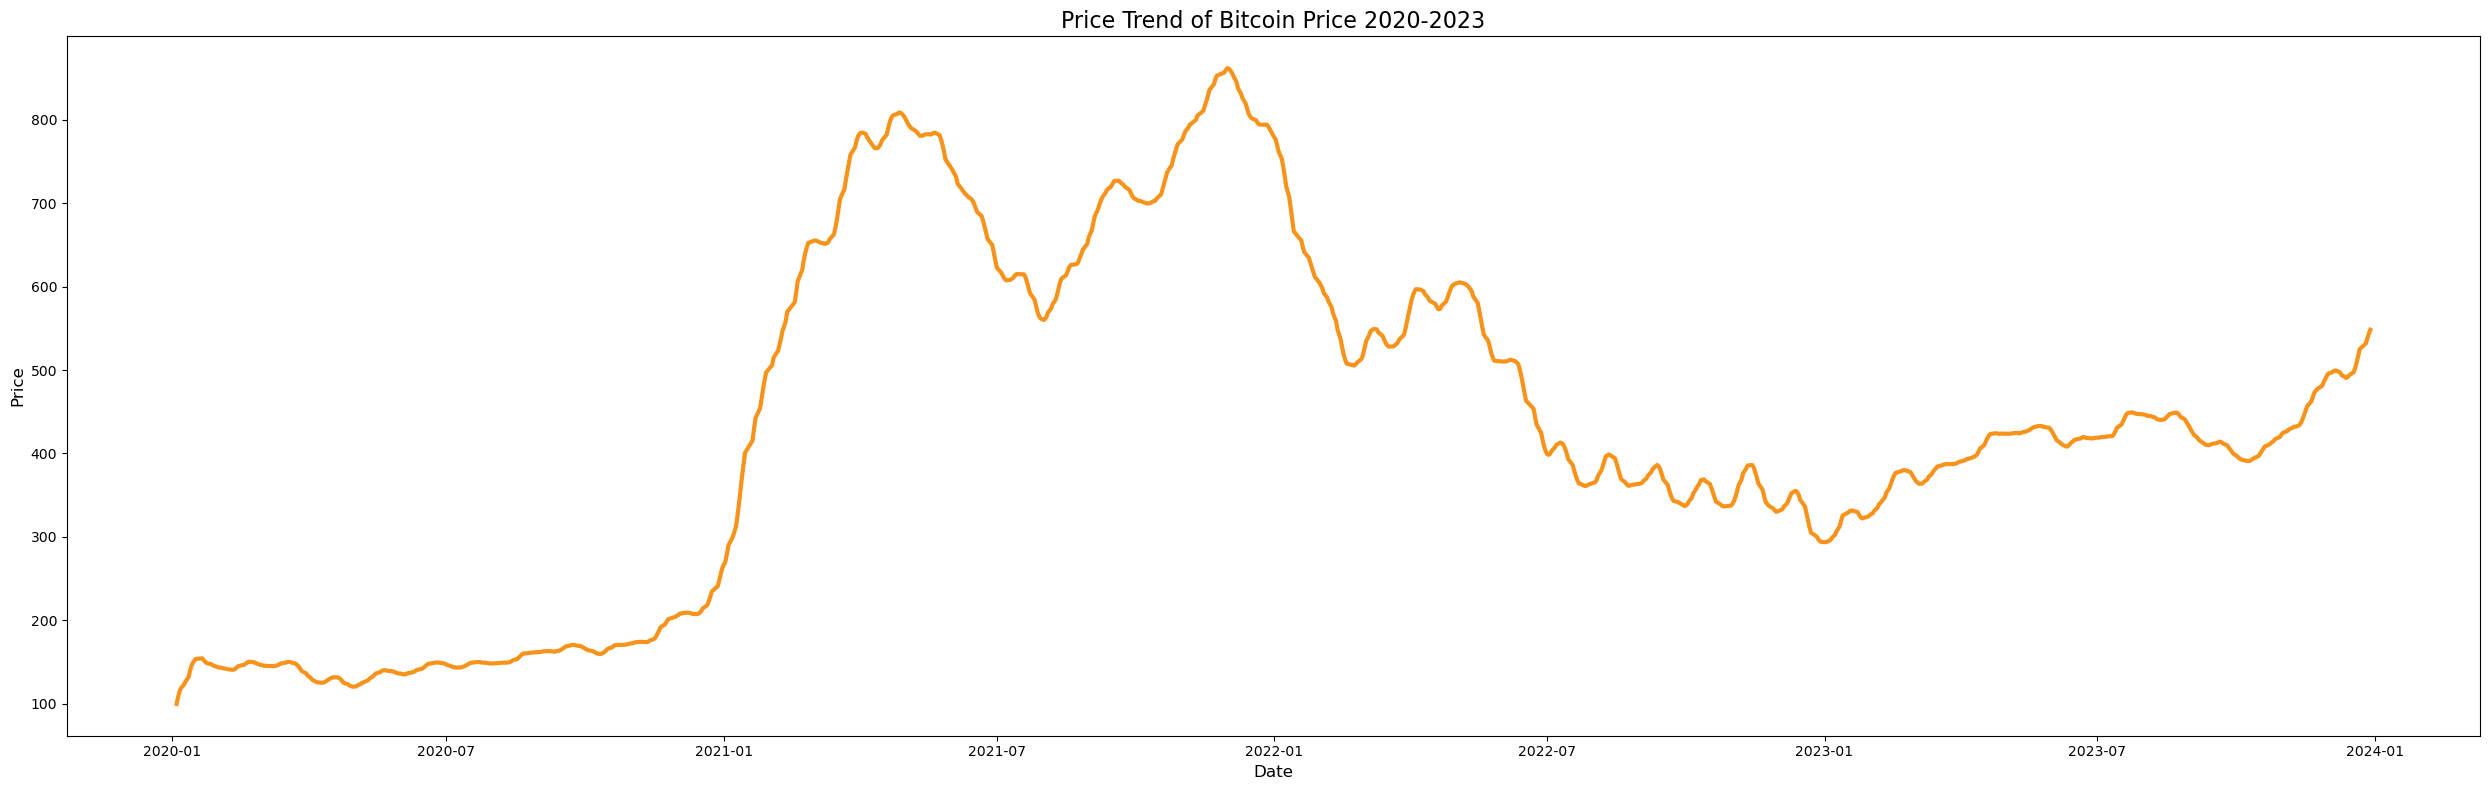

In [ ]:
asset = 'Bitcoin_Price'

plt.figure(figsize=(25,8))
plt.plot(norm_df[asset], color=colorsbrand_colors[asset], label=asset.replace('_', ''), linewidth=3)

plt.title(f"Price Trend of {asset.replace('_', ' ')} 2020-2023", fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.tight_layout()
plt.show()

In [260]:
print(f"Harga teringgi : {df[asset].max()} pada {df[asset].idxmax()}")
print(f"Harga terendah : {df[asset].min()} pada {df[asset].idxmin()}")
print(f"Rata-rata harga : {df[asset].mean()}")
print(f"Harga perawalan  {asset} : {df[asset].iloc[0]} pada {df.index[0]}")
print(f"Harga perakhiran {asset} : {df[asset].iloc[-1]} pada {df.index[-1]}")

Harga teringgi : 67527.9 pada 2021-08-11 00:00:00
Harga terendah : 4826.0 pada 2020-12-03 00:00:00
Rata-rata harga : 28894.104747474747
Harga perawalan  Bitcoin_Price : 6638.5 pada 2020-01-04 00:00:00
Harga perakhiran Bitcoin_Price : 42072.4 pada 2023-12-29 00:00:00


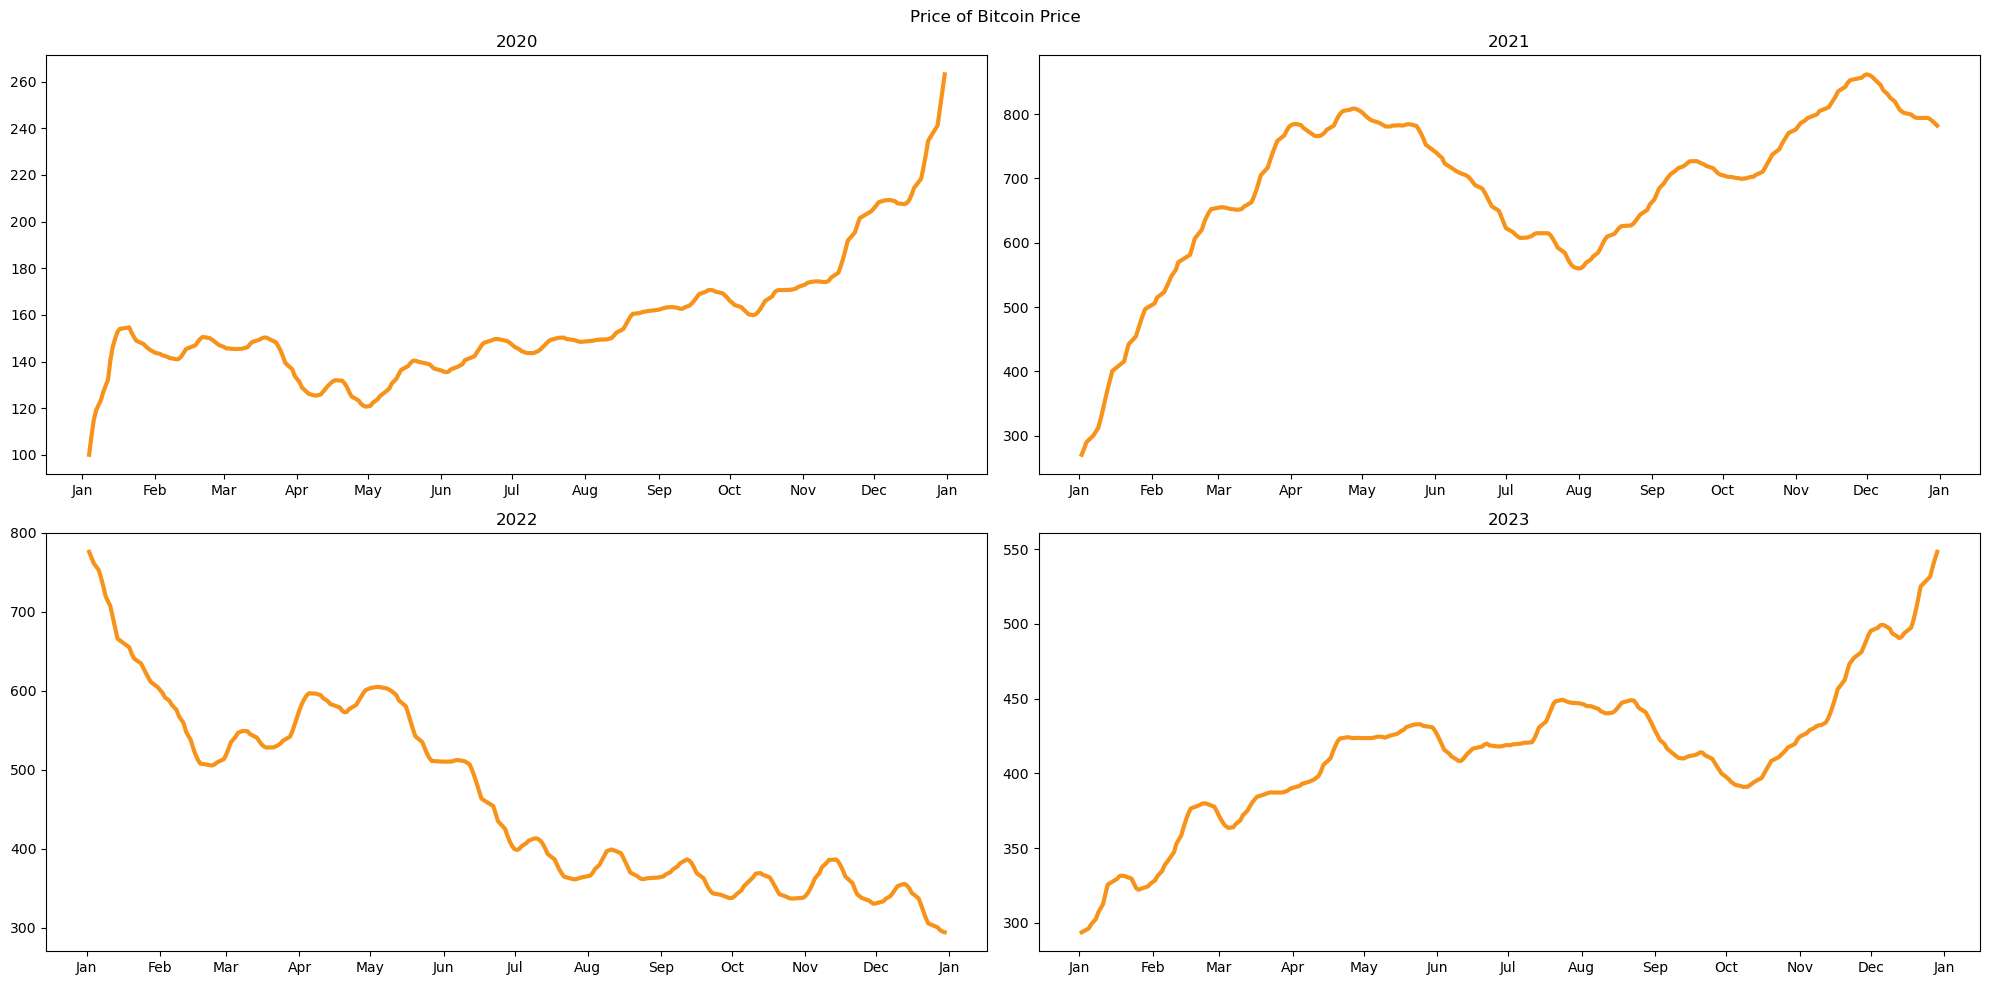

In [261]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

fig.suptitle(f"Price of {asset.replace('_', ' ')}")

years = norm_df.index.year.unique()

for i, year in enumerate(years):
  ax = axes[i//2, i%2]

  year_df = norm_df[norm_df.index.year == year]

  ax.plot(year_df.index, year_df[asset], label=asset.replace('_', ' '), color=colorsbrand_colors[asset], linewidth=3 )
  ax.set_title(f'{year}')
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
  ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


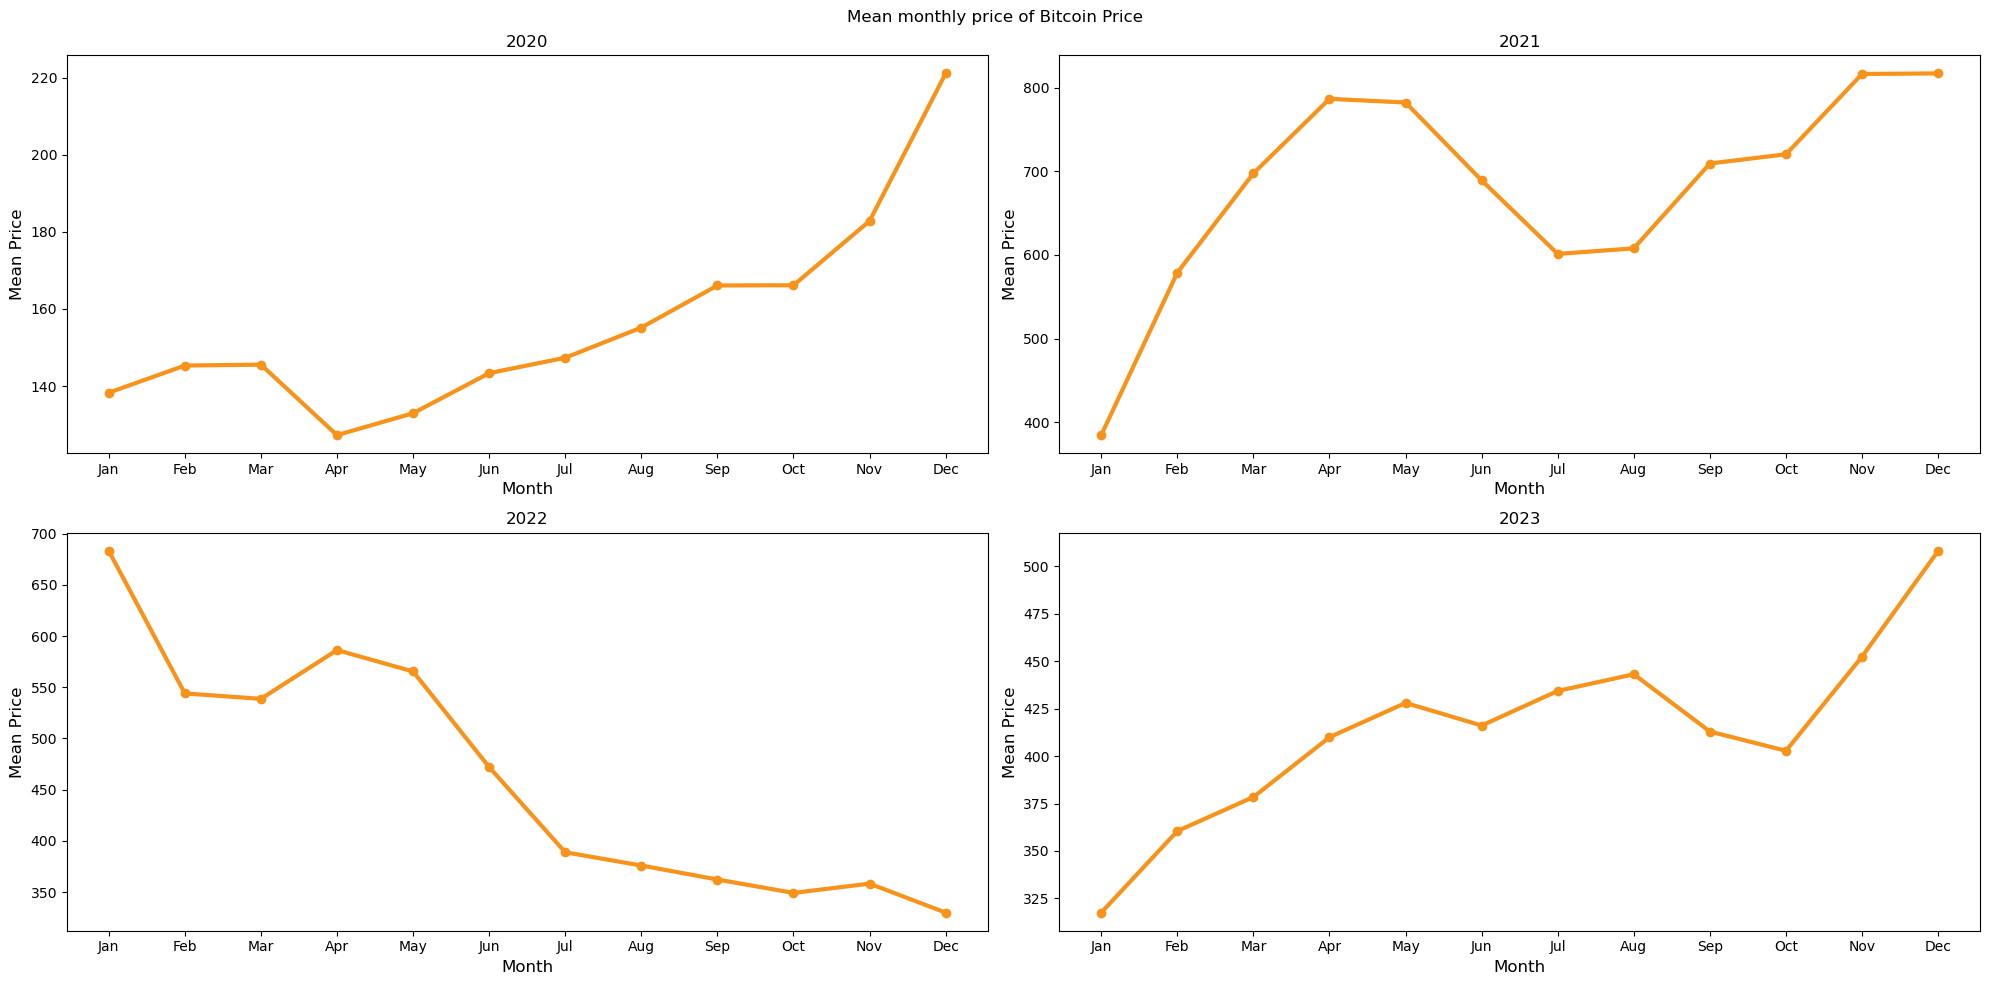

In [267]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle(f"Mean monthly price of {asset.replace('_', ' ')}")

mean_monthly = norm_df.groupby(norm_df.index.to_period('M'))[asset].mean()

years = mean_monthly.index.year.unique()

for i, year in enumerate(years):
    ax = axes[i//2, i%2]
    years = mean_monthly[mean_monthly.index.year == year]

    months = [month.month for month in years.index]

    ax.plot(months, years.values, color=colorsbrand_colors[asset], marker='o', linewidth=3)
    ax.set_title(year)
    ax.set_ylabel('Mean Price', fontsize=12)
    ax.set_xlabel('Month', fontsize=12)
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(list(calendar.month_abbr[1:]))

plt.tight_layout()
plt.show()

In [268]:
print(f"Rata-rata Tertinggi tahun 2020 : {mean_monthly[mean_monthly.index.year == 2020].max():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2020].idxmax().month]}")
print(f"Rata-rata Terendah tahun 2020 : {mean_monthly[mean_monthly.index.year == 2020].min():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2020].idxmin().month]}")
print(f"Rata-rata Tertinggi tahun 2021 : {mean_monthly[mean_monthly.index.year == 2021].max():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2021].idxmax().month]}")   
print(f"Rata-rata Terendah tahun 2021 : {mean_monthly[mean_monthly.index.year == 2021].min():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2021].idxmin().month]}")
print(f"Rata-rata Tertinggi tahun 2022 : {mean_monthly[mean_monthly.index.year == 2022].max():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2022].idxmax().month]}")   
print(f"Rata-rata Terendah tahun 2022 : {mean_monthly[mean_monthly.index.year == 2022].min():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2022].idxmin().month]}")
print(f"Rata-rata Tertinggi tahun 2023 : {mean_monthly[mean_monthly.index.year == 2023].max():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2023].idxmax().month]}")
print(f"Rata-rata Terendah tahun 2023 : {mean_monthly[mean_monthly.index.year == 2023].min():.3f} pada {calendar.month_name[mean_monthly[mean_monthly.index.year == 2023].idxmin().month]}")

Rata-rata Tertinggi tahun 2020 : 221.175 pada December
Rata-rata Terendah tahun 2020 : 127.243 pada April
Rata-rata Tertinggi tahun 2021 : 817.305 pada December
Rata-rata Terendah tahun 2021 : 384.338 pada January
Rata-rata Tertinggi tahun 2022 : 683.118 pada January
Rata-rata Terendah tahun 2022 : 330.003 pada December
Rata-rata Tertinggi tahun 2023 : 508.054 pada December
Rata-rata Terendah tahun 2023 : 317.518 pada January


In [ ]:
df_2020 = norm_df[norm_df.index.year == 2020]
month_2020 = df_2020.index.month.unique()

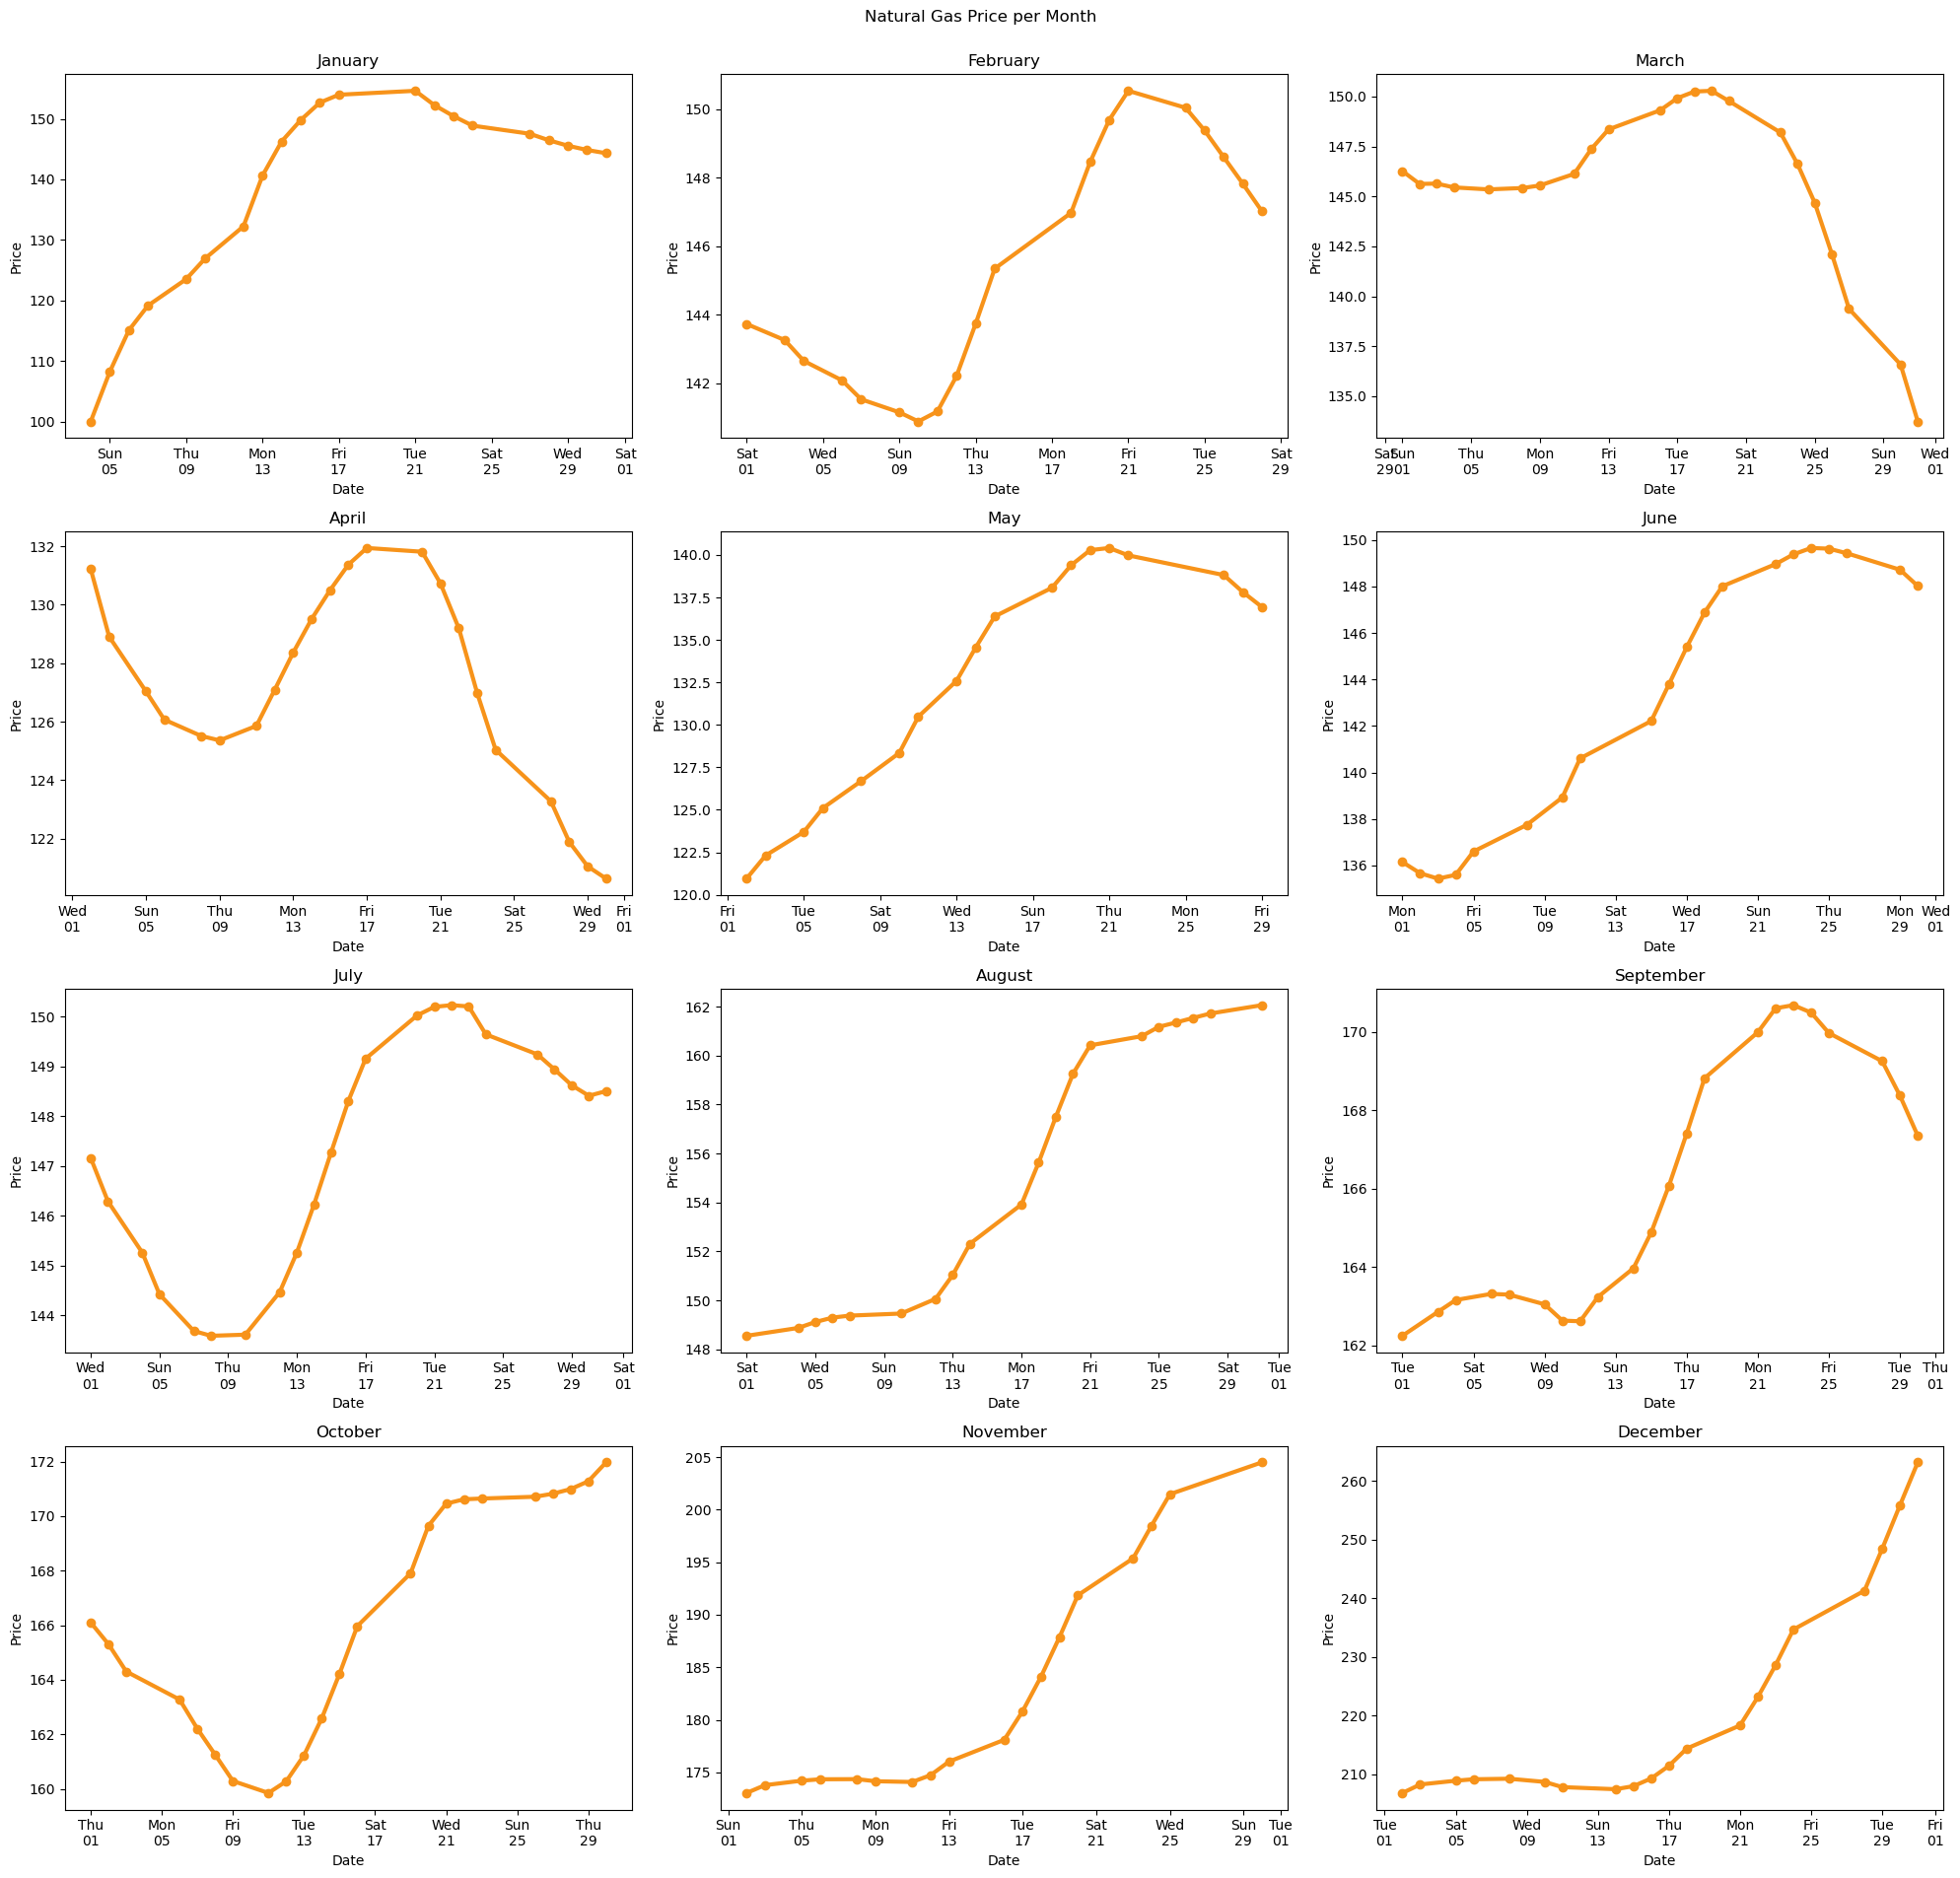

In [269]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Natural Gas Price per Month', y=0.98)

df_2020 = norm_df[norm_df.index.year == 2020]
month_2020 = df_2020.index.month.unique()

for i, month in enumerate(month_2020):
  ax = axes[i//3, i%3]

  month_df = df_2020[df_2020.index.month == month]

  ax.plot(month_df.index, month_df[asset], label=asset.replace('_', ''), color=colorsbrand_colors[asset], marker='o', linewidth=3)
  ax.set_title(f'{calendar.month_name[month]}')
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%a\n%d'))
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()



In [270]:
for i, month in enumerate(month_2020):
  month_df = df_2020[df_2020.index.month == month]
  print(f"{calendar.month_name[month]}")
  print(f"harga awal : {month_df[asset].iloc[0]}")
  print(f"harga akhir : {month_df[asset].iloc[-1]}")

  max_price = month_df[asset].idxmax()
  max_date_format = max_price.strftime('%A, %d %B %Y')
  print(f"harga tertinggi : {month_df[asset].max()} pada tanggal {max_date_format}")
  min_price = month_df[asset].idxmin()
  min_date_format = min_price.strftime('%A, %d %B %Y')
  print(f"harga terendah : {month_df[asset].min()} pada tanggal {min_date_format}")


January
harga awal : 100.0
harga akhir : 144.32231638752498
harga tertinggi : 154.63777141812196 pada tanggal Tuesday, 21 January 2020
harga terendah : 100.0 pada tanggal Saturday, 04 January 2020
February
harga awal : 143.73077817754887
harga akhir : 147.02067664453745
harga tertinggi : 150.53768600910274 pada tanggal Friday, 21 February 2020
harga terendah : 140.88544553246484 pada tanggal Monday, 10 February 2020
March
harga awal : 146.26991897911535
harga akhir : 133.74133571482372
harga tertinggi : 150.28669700914935 pada tanggal Thursday, 19 March 2020
harga terendah : 133.74133571482372 pada tanggal Tuesday, 31 March 2020
April
harga awal : 131.21860575216004
harga akhir : 120.63055696030013
harga tertinggi : 131.9435328548833 pada tanggal Friday, 17 April 2020
harga terendah : 120.63055696030013 pada tanggal Thursday, 30 April 2020
May
harga awal : 120.95116151454178
harga akhir : 136.93871607541865
harga tertinggi : 140.41054168146132 pada tanggal Thursday, 21 May 2020
harga t

# EDA Correlation

In [237]:
def corr_value(ax, df, feature):

  corr_data = df.corr().loc[[feature]]

  corr_sort = corr_data.T.sort_values(by=feature, ascending=False).T

  clean_labels = [col.replace('_Price', '') for col in corr_sort.columns]

  sns.heatmap(corr_sort, cmap='coolwarm', annot=True, ax=ax, fmt='.3f',center=0, cbar=False, square=True)

  ax.set_xticklabels(clean_labels, rotation=20)
  
  ax.set_title(f'Korelasi dengan {feature.replace('_Price', '')}')
  


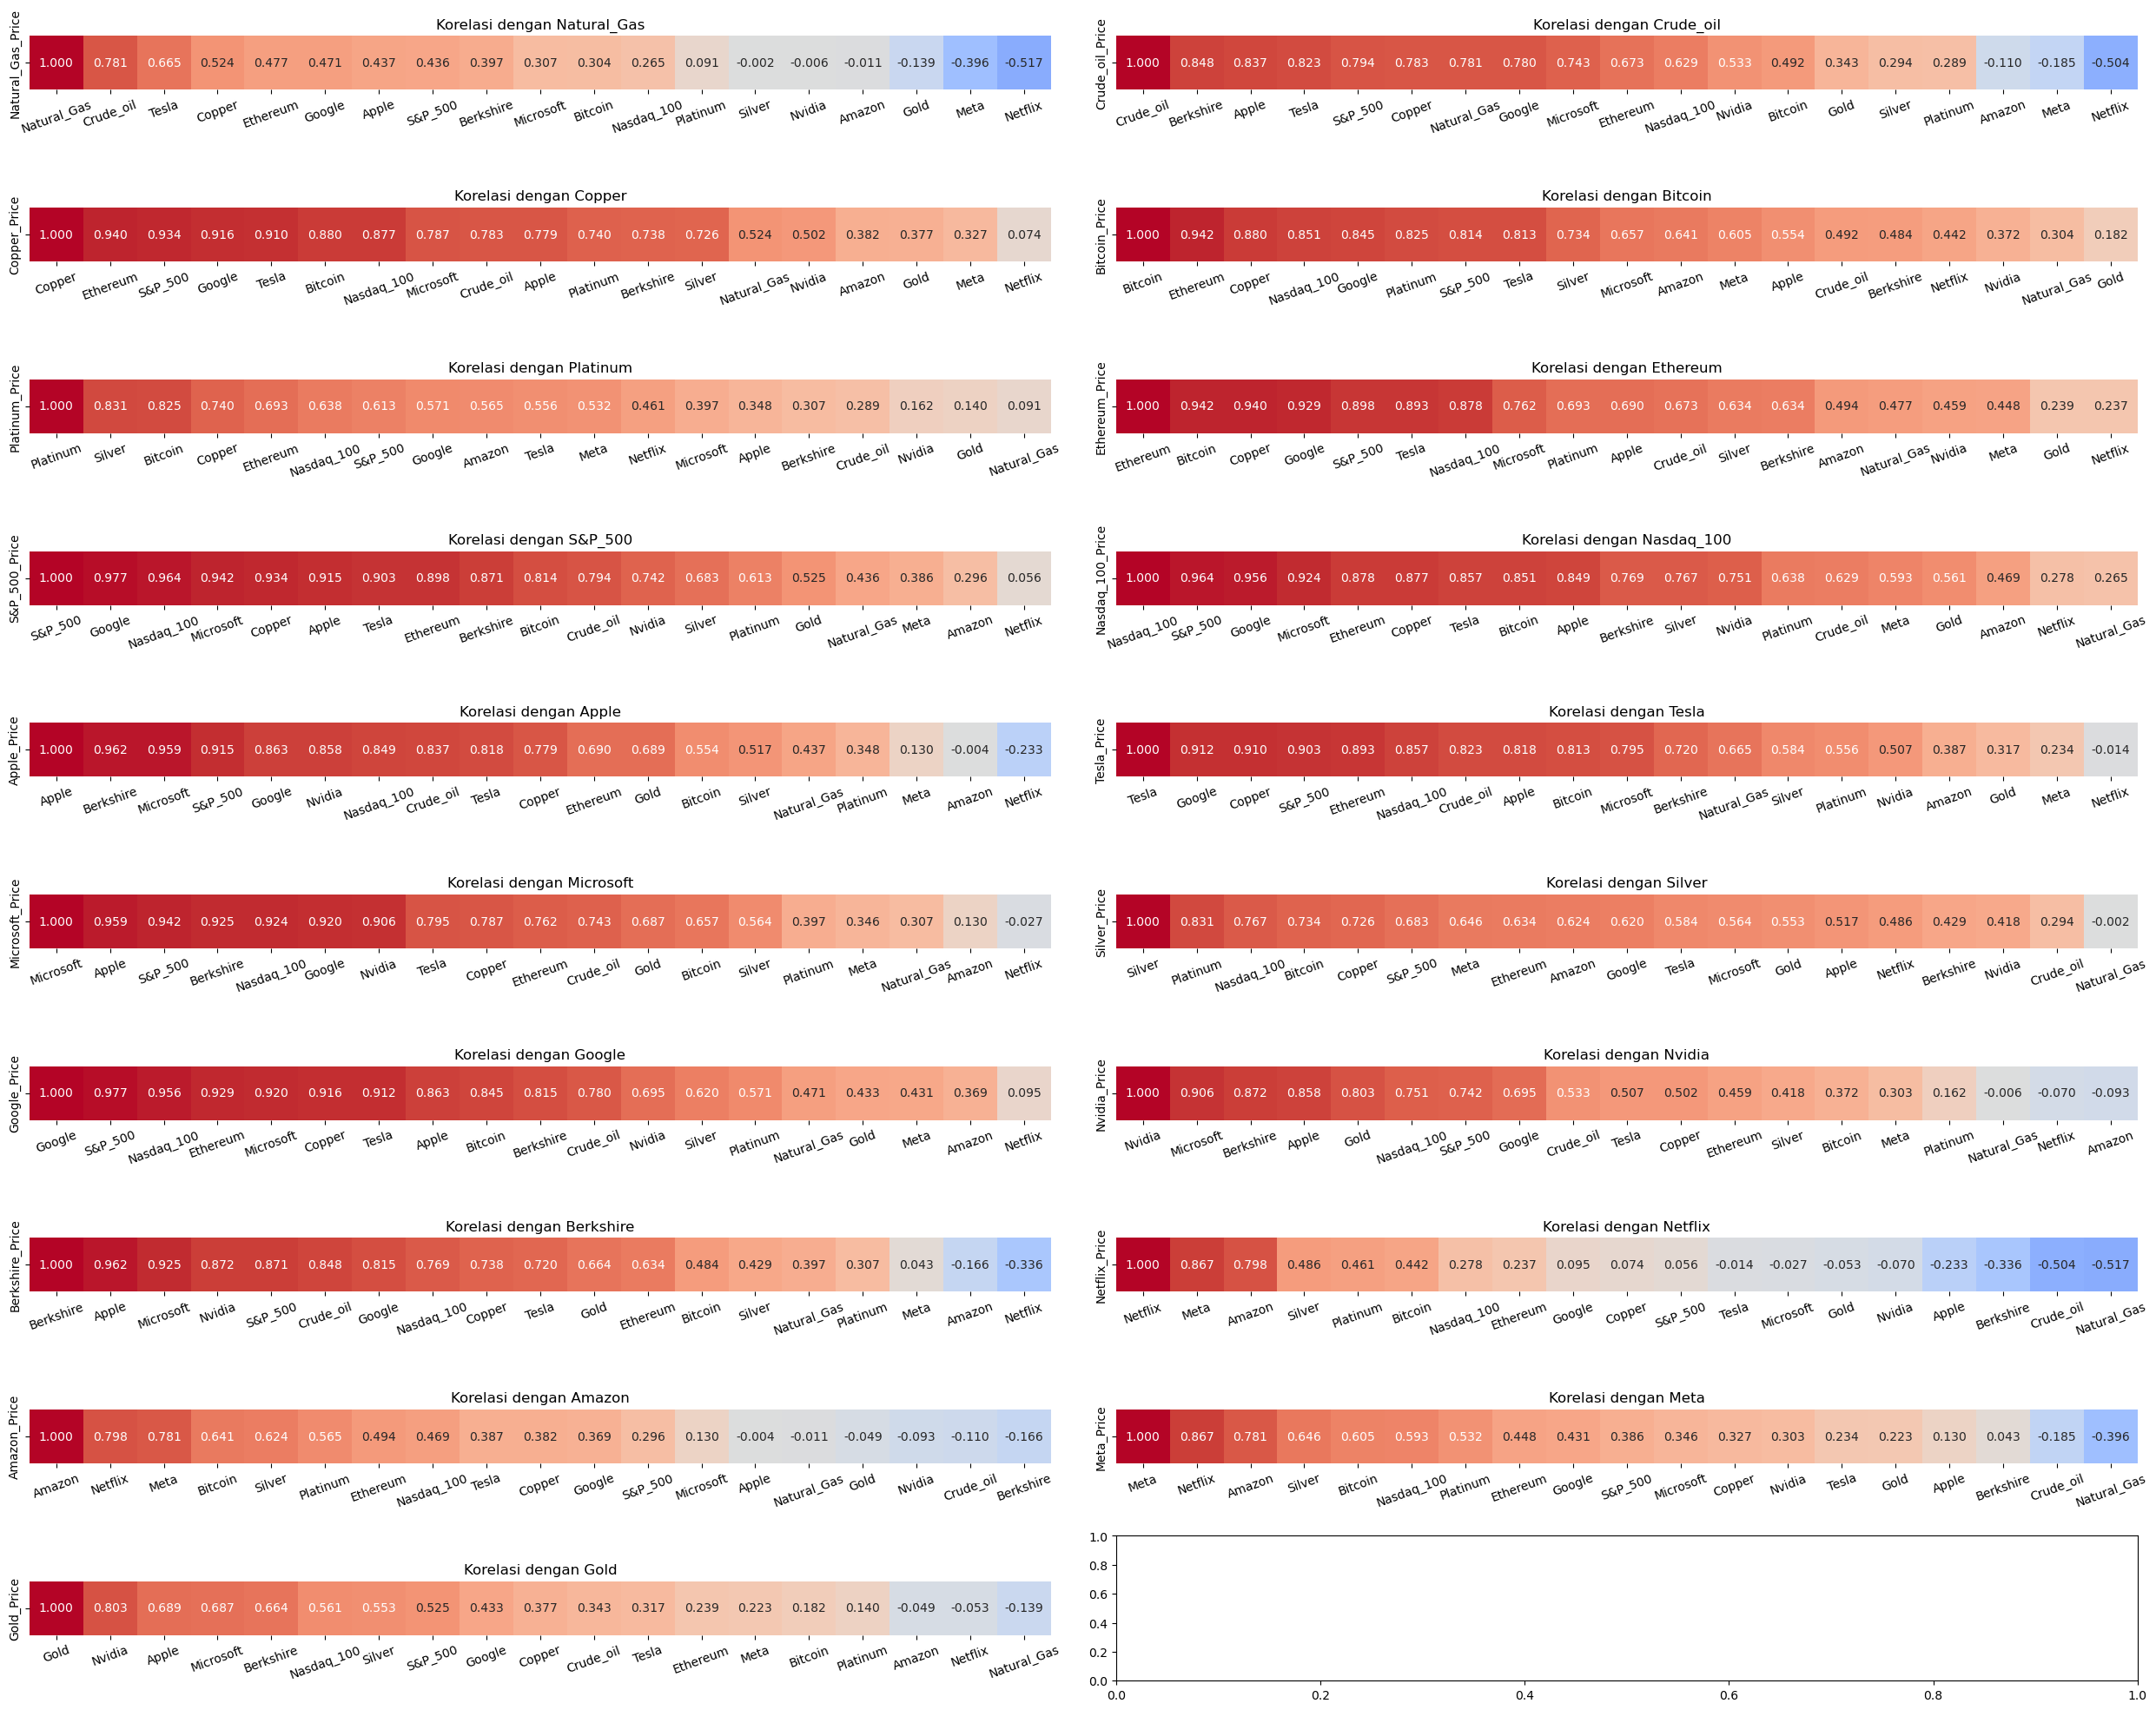

In [238]:
fig, axes = plt.subplots(10, 2, figsize=(25, 20))
axes = axes.flatten()

for i, feature in enumerate(norm_df.columns.tolist()):
  corr_value(axes[i], norm_df, feature)

plt.tight_layout()
plt.show()


In [239]:
def plot_correlation_feature(ax, target, corr_df, norm_df, corr):

  if target in norm_df.columns:
      ax.plot(norm_df[target], label=target,
              linewidth=2, color='red')

  filter = corr_df[(corr_df['Target'] == target) & (corr_df['Korelasi'] > corr)]

  dict_corr = dict(zip(filter['Fitur'], filter['Korelasi']))

  for fitur, corr in dict_corr.items():
    if fitur != target:
      ax.plot(norm_df[fitur], label=f'{fitur} korelasi : {corr:.3f}', linewidth=1)

  ax.set_title(f'Korelasi dengan {target}')
  ax.legend()

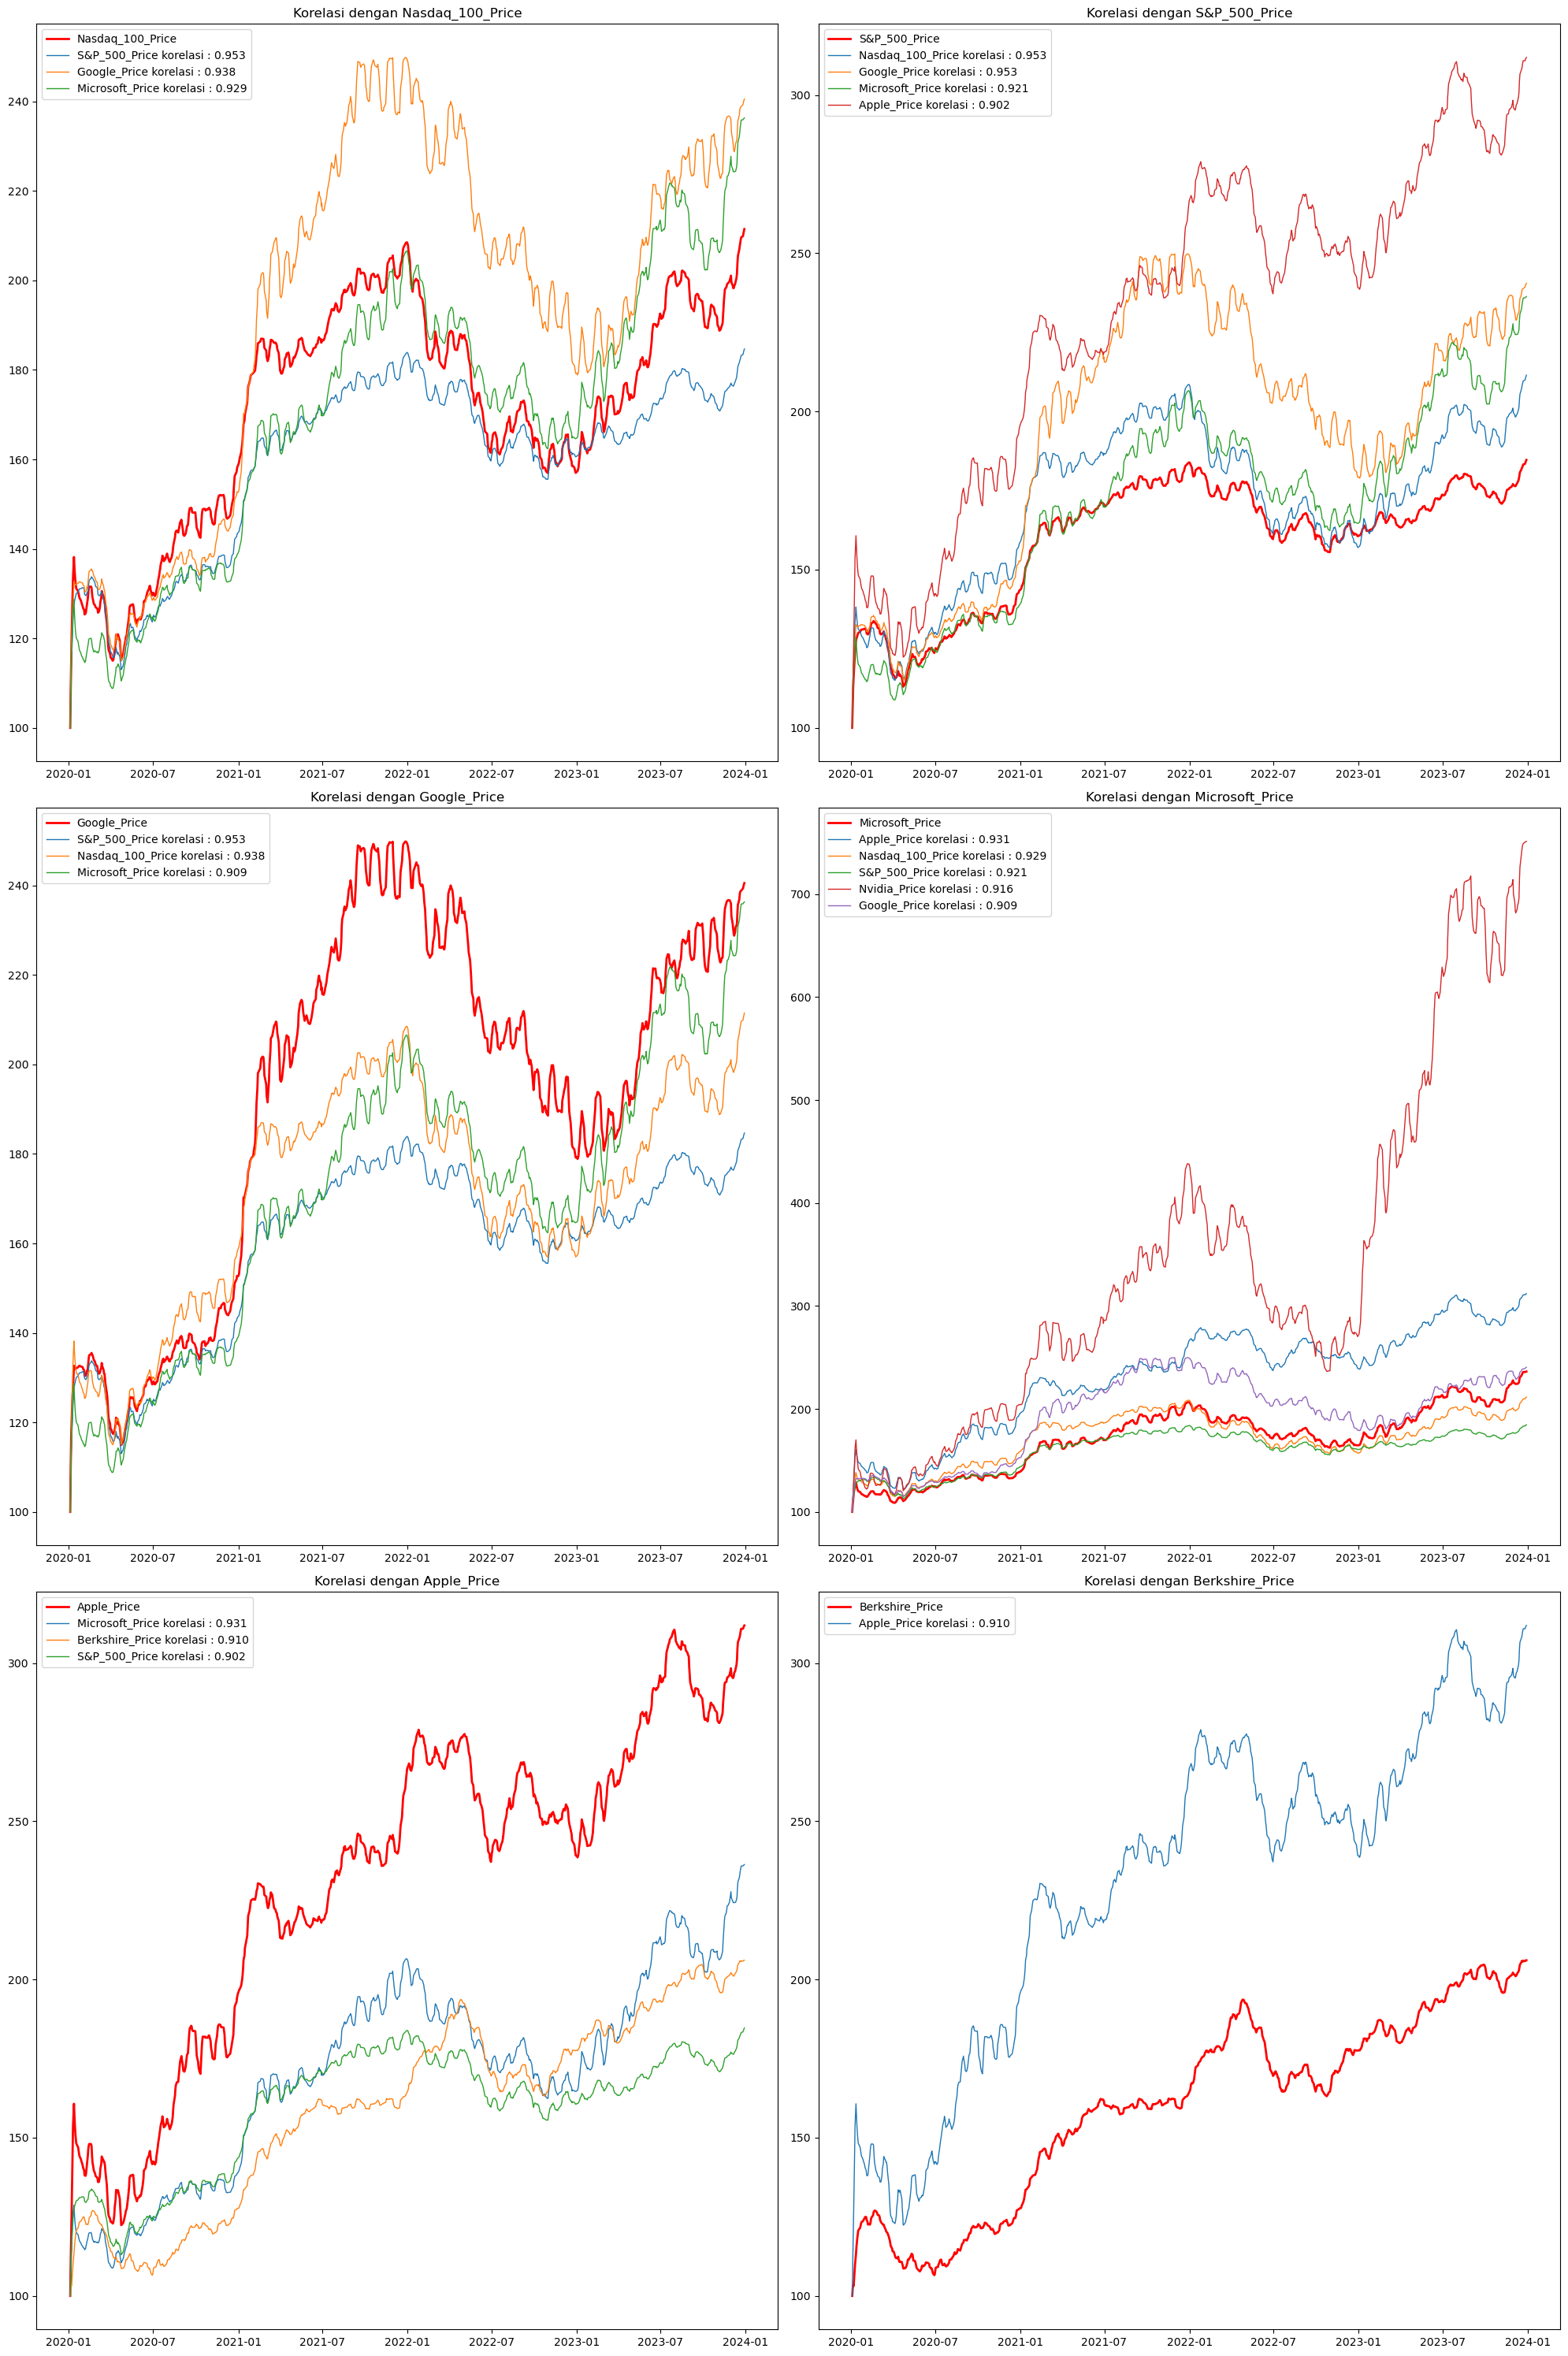

In [240]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Nasdaq_100_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax2, 'S&P_500_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax3, 'Google_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax4, 'Microsoft_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax5, 'Apple_Price', corr_df, norm_df,corr=0.9)
plot_correlation_feature(ax6, 'Berkshire_Price', corr_df, norm_df,corr=0.9)

plt.tight_layout()
plt.show()

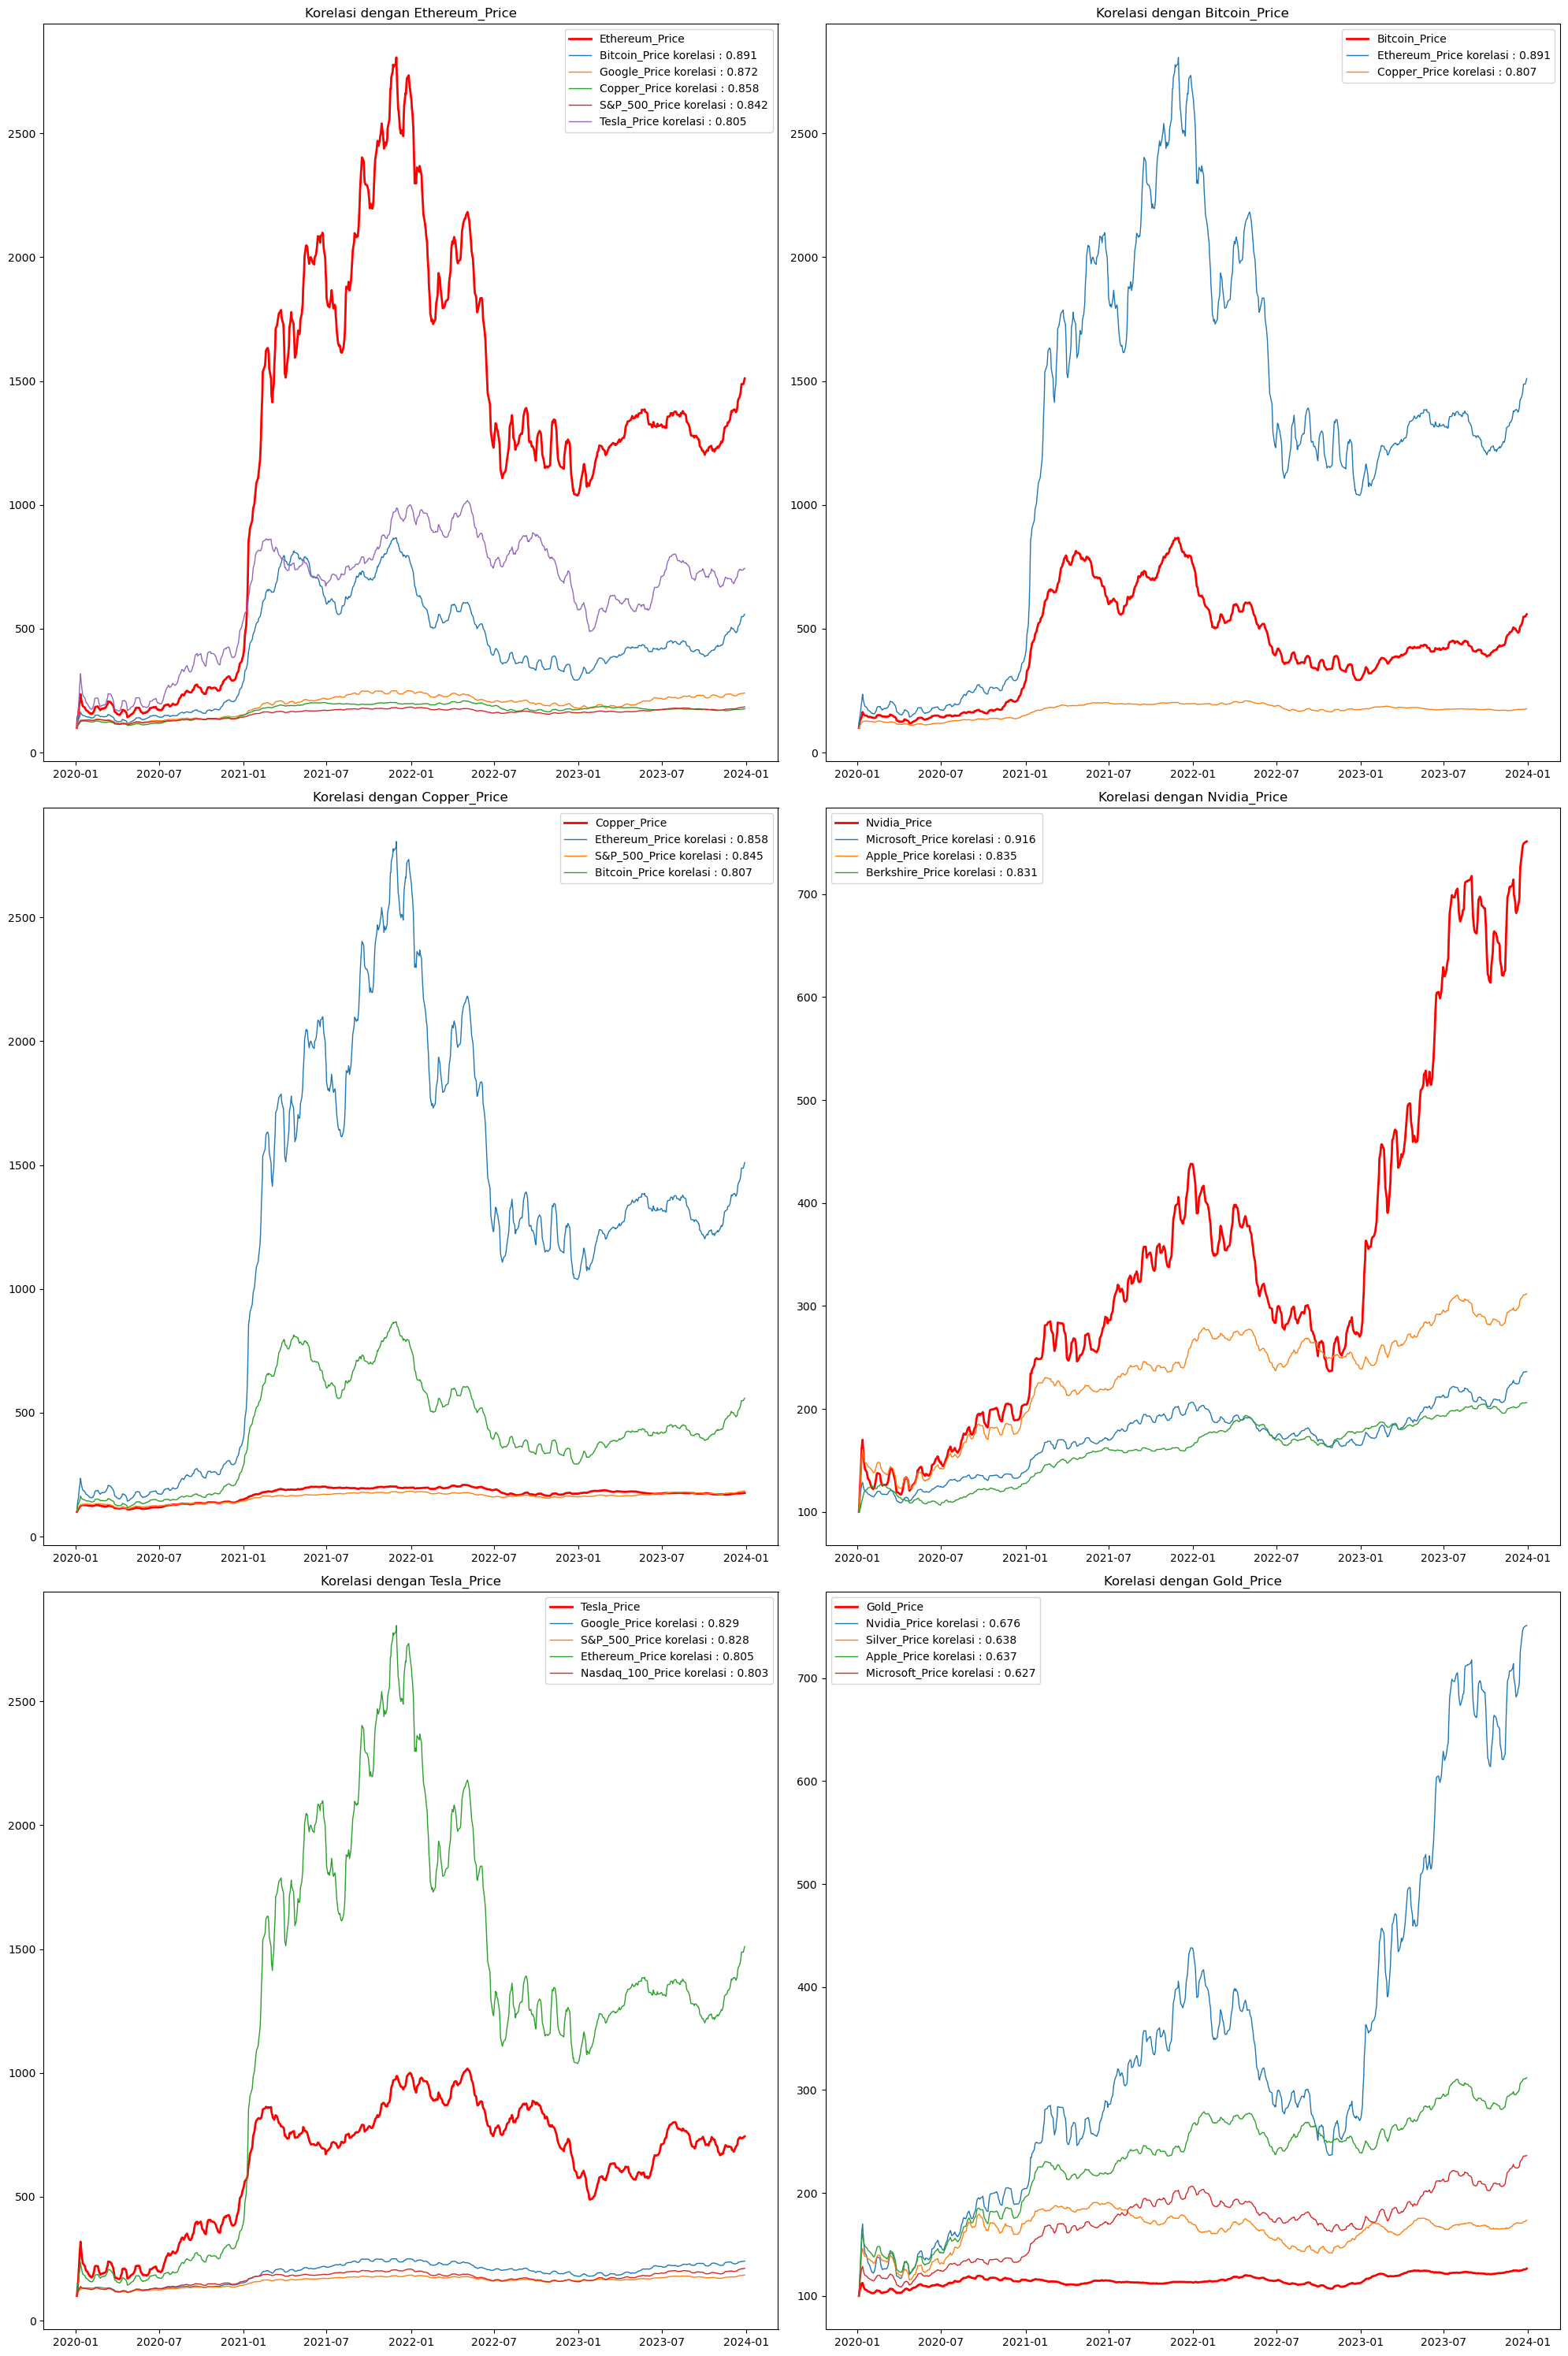

In [ ]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Ethereum_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax2, 'Bitcoin_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax3, 'Copper_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax4, 'Nvidia_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax5, 'Tesla_Price', corr_df, norm_df,corr=0.8)
plot_correlation_feature(ax6, 'Gold_Price', corr_df, norm_df,corr=0.6)

plt.tight_layout()
plt.show()

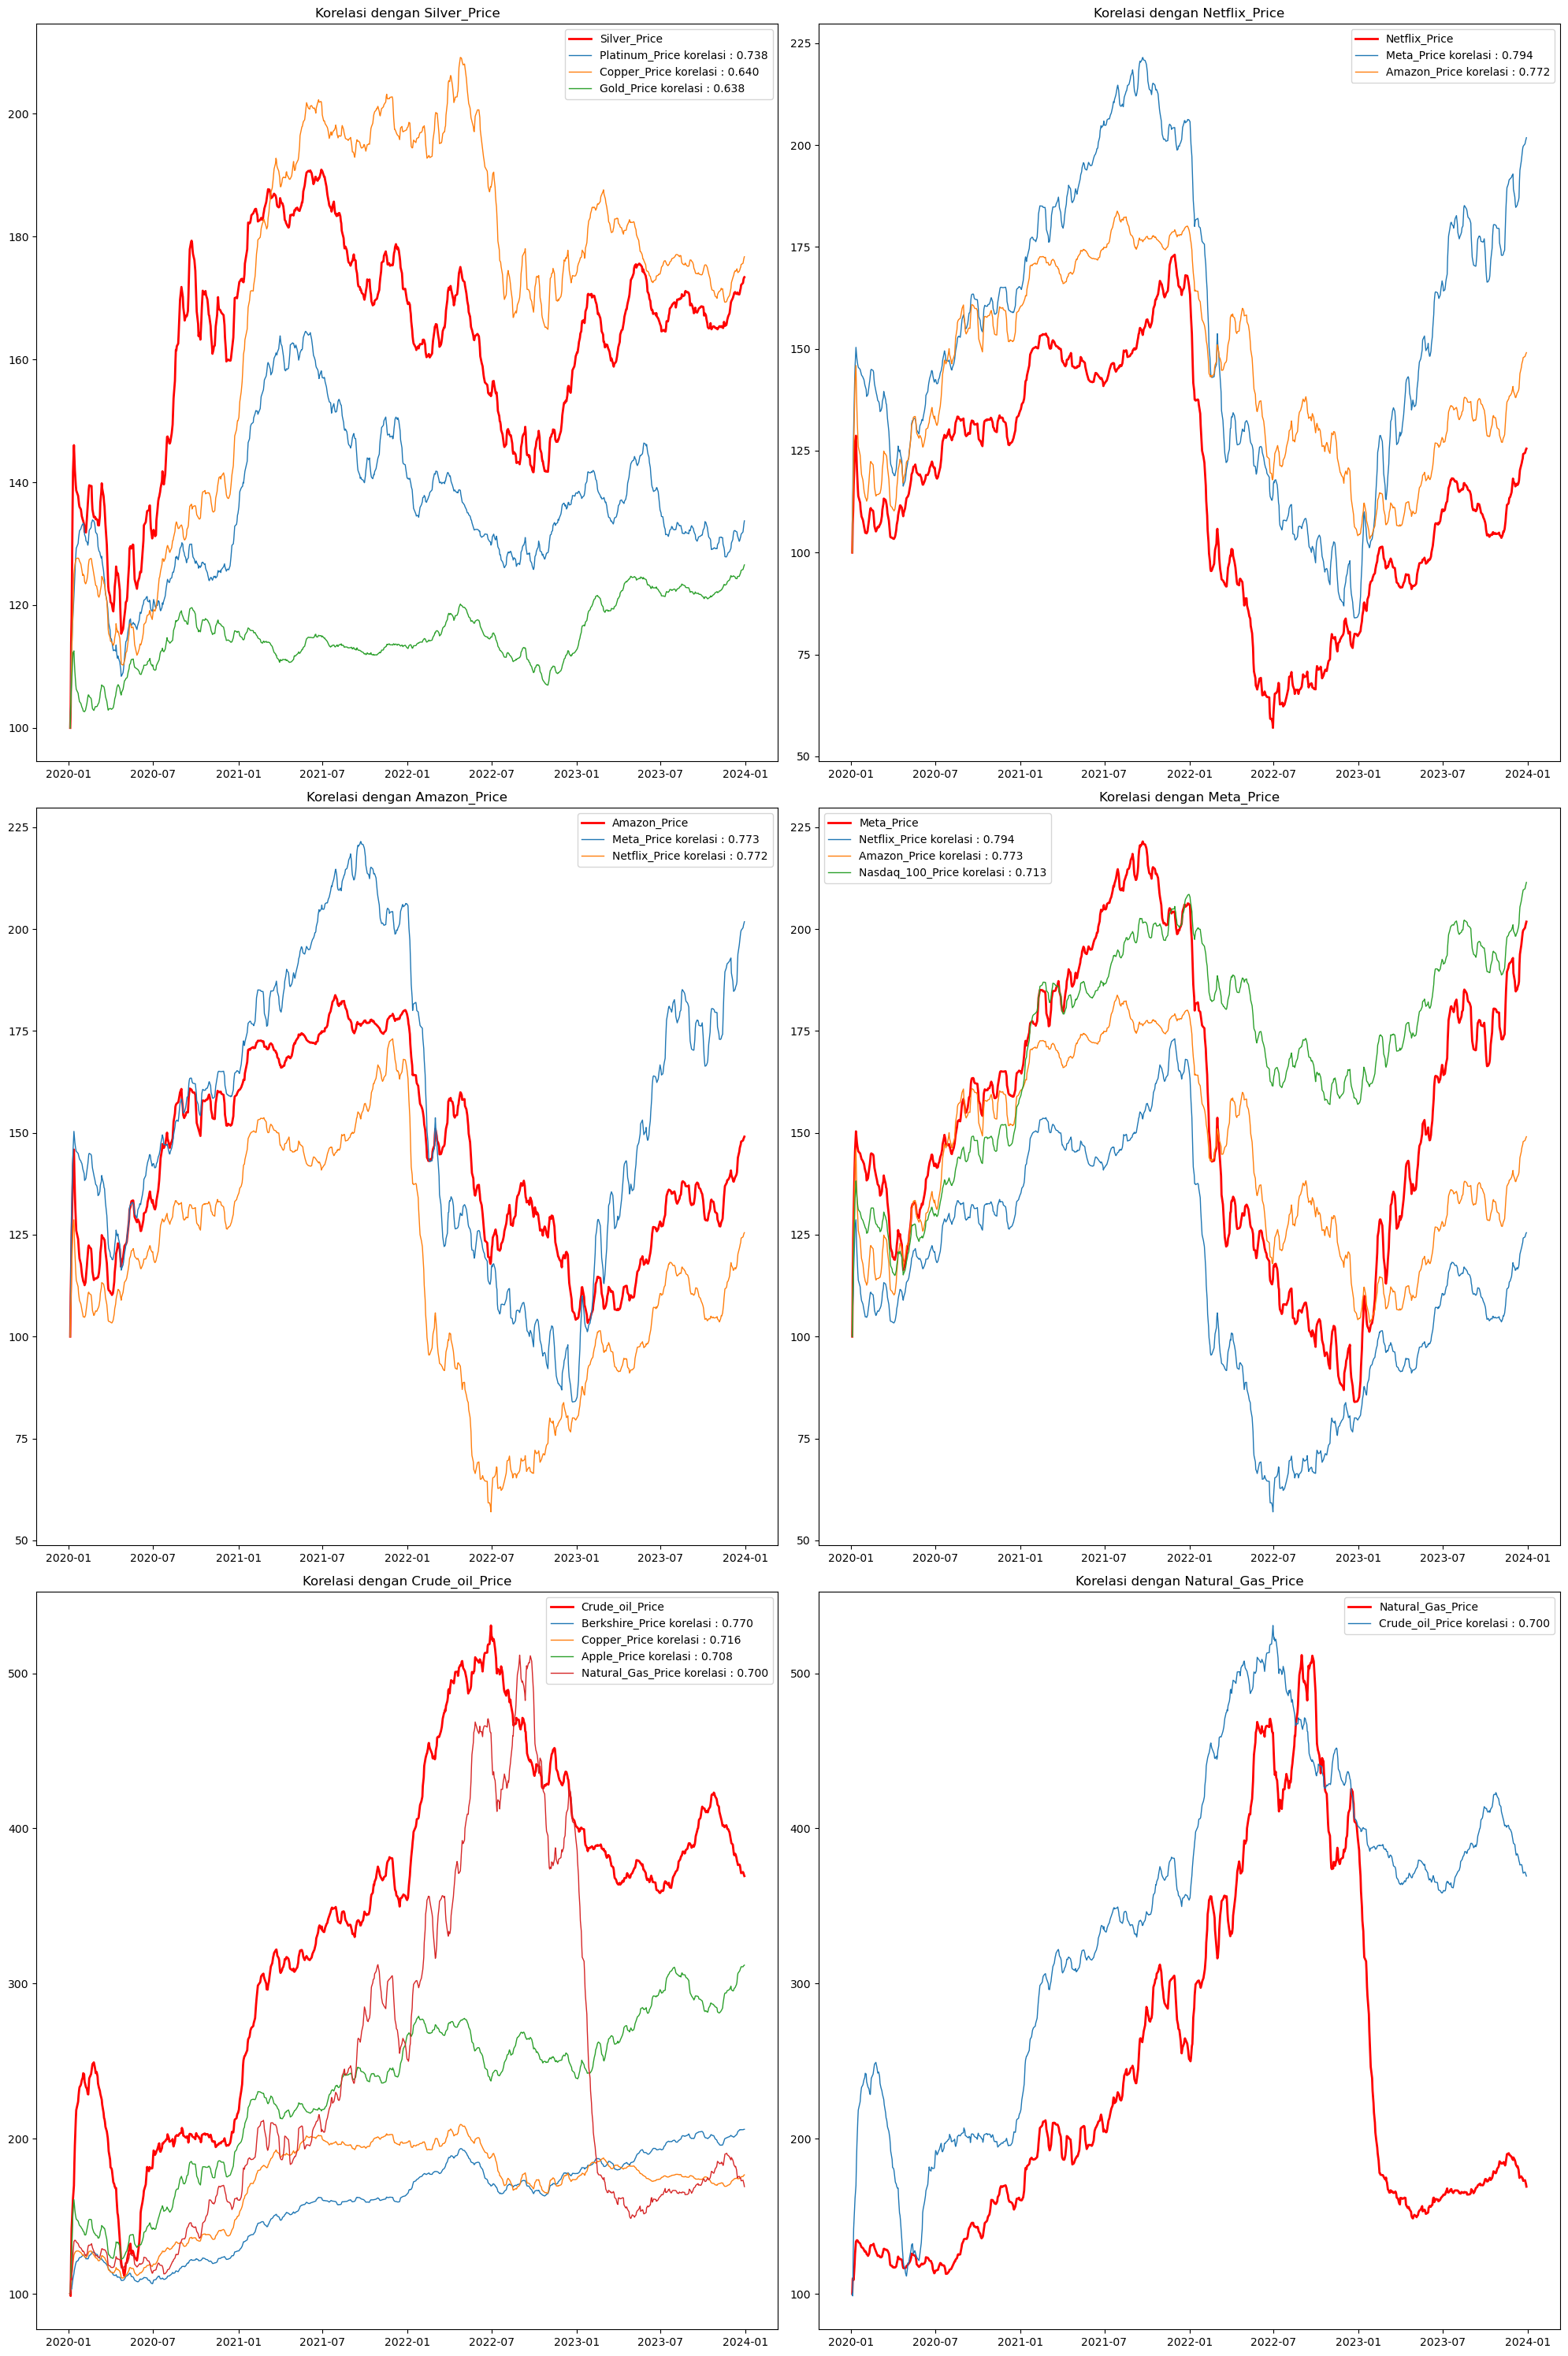

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,30))

plot_correlation_feature(ax1, 'Silver_Price', corr_df, norm_df,corr=0.6)
plot_correlation_feature(ax2, 'Netflix_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax3, 'Amazon_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax4, 'Meta_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax5, 'Crude_oil_Price', corr_df, norm_df,corr=0.7)
plot_correlation_feature(ax6, 'Natural_Gas_Price', corr_df, norm_df,corr=0.7)

plt.tight_layout()
plt.show()

In [ ]:
asset_categories = {
    'Tech Stocks': ['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price',
                   'Nvidia_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'],
    'Cryptocurrencies': ['Bitcoin_Price', 'Ethereum_Price'],
    'Commodities': ['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price',
                   'Silver_Price', 'Gold_Price', 'Platinum_Price'],
    'Market Indices': ['S&P_500_Price', 'Nasdaq_100_Price', 'Berkshire_Price']
}

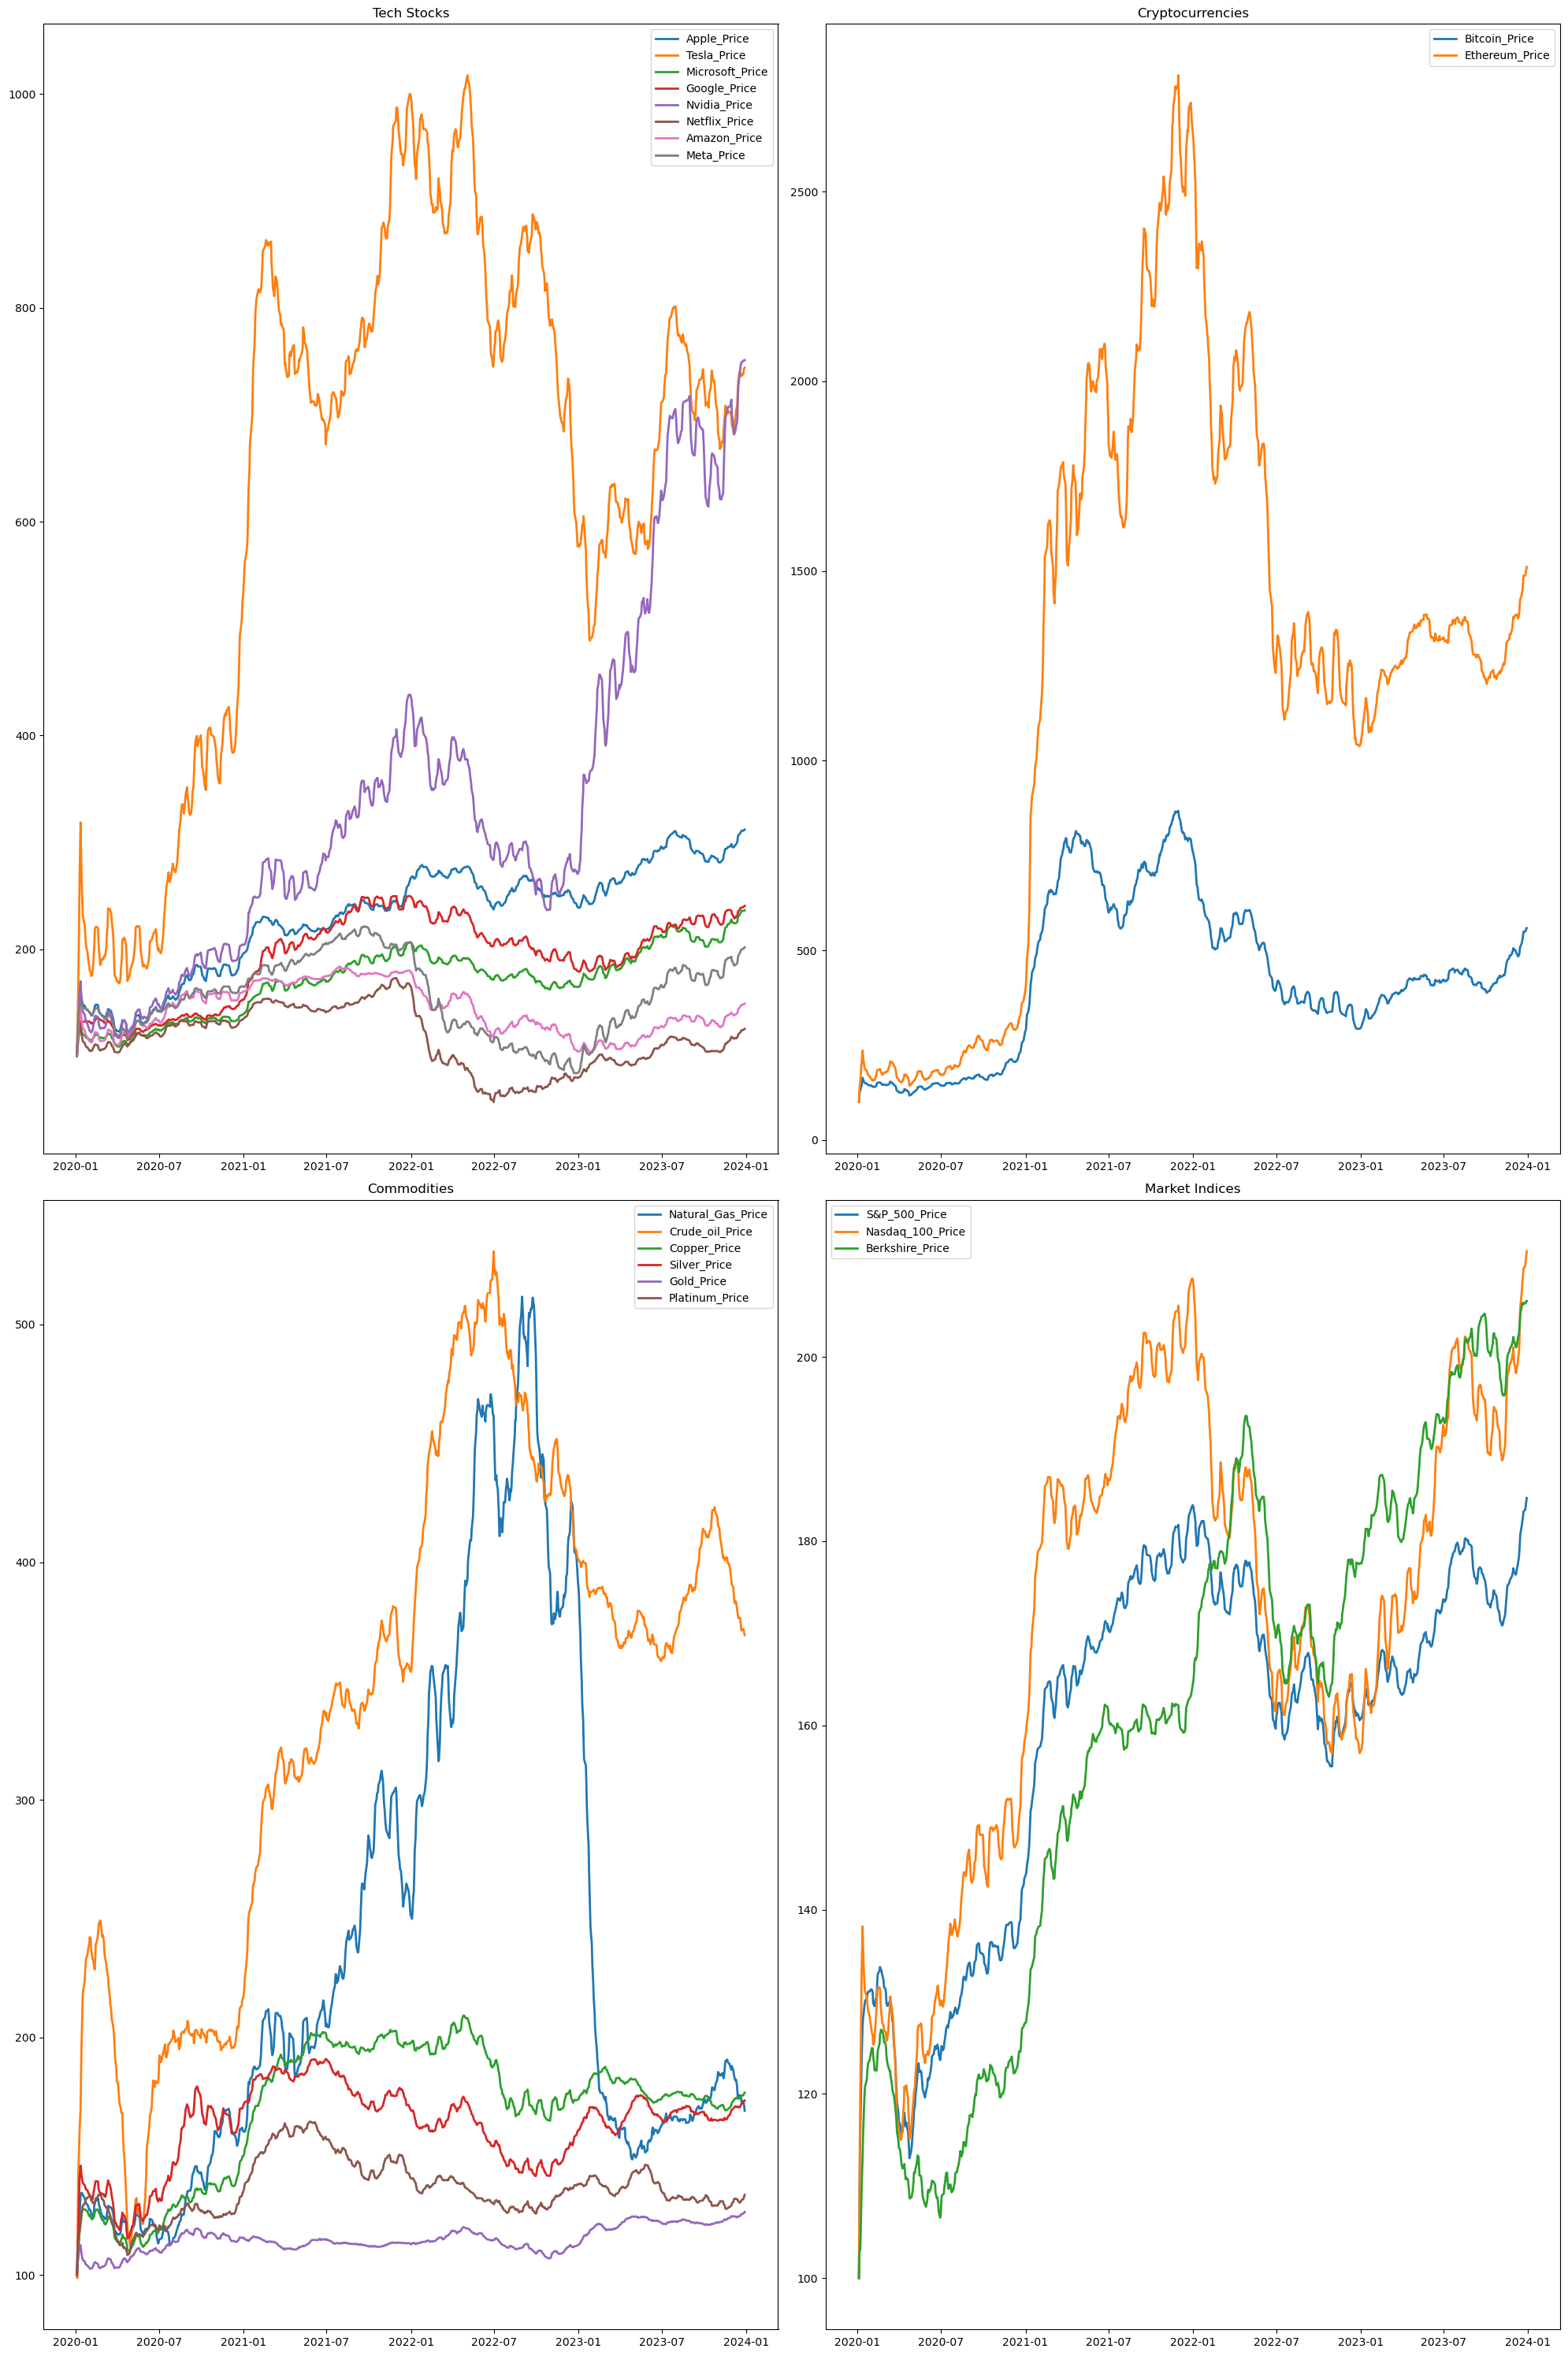

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(20,30))

for i, (category, assets) in enumerate(asset_categories.items()):
    ax = axes[i // 2, i % 2]

    for asset in assets:
        ax.plot(norm_df[asset], label=asset, linewidth=2)

    ax.set_title(category)
    ax.legend()

plt.tight_layout()
plt.show()

# EDA Return asset

In [280]:
price_data = df[price_columns].dropna()
returns = price_data.pct_change().dropna()
returns.sort_index(inplace=True)
returns.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05           0.190926        -0.026096      0.061037       0.328854   
2020-01-06          -0.061376         0.791709      0.071799       0.155040   
2020-01-07          -0.058061         0.123589      0.103309      -0.094158   
2020-01-09           0.512268         0.073832      0.105523       0.290902   
2020-01-10           0.000000        -0.094481     -0.051944      -0.108637   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05        0.082742        0.562730       0.145804          0.164553   
2020-01-06        0.156306        0.169670       0.079492          0.101020   
2020-01-07       -0.070921       -0.068637       0.019678          0.070879   
2020-01-09        0.149381        1.060186       0.131838          0.195891   
2020-01-10       -0.057624       -0.257945      -0.041357         -0.057729   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05     0.199900     0.456386         0.147656      0.068221   
2020-01-06     0.113325     0.280642         0.047316      0.260343   
2020-01-07     0.131370     0.246701         0.119619     -0.032347   
2020-01-09     0.474020     1.121517         0.110259      0.572346   
2020-01-10    -0.129602    -0.056584        -0.065165     -0.153290   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05      0.195463      0.163238         0.048708       0.140601   
2020-01-06      0.089115      0.245721         0.005931       0.025646   
2020-01-07      0.005018      0.082217        -0.031132       0.140214   
2020-01-09      0.147712      0.450262         0.226275       0.146014   
2020-01-10     -0.101027     -0.014905        -0.026997      -0.052179   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-05      0.198239    0.267356    0.068807  
2020-01-06      0.080927    0.146537    0.029043  
2020-01-07      0.165034    0.024320    0.016911  
2020-01-09      0.215506    0.243696    0.111804  
2020-01-10     -0.079447   -0.097516   -0.031634

In [281]:
returns.index.year.value_counts()

Date
2023    250
2020    248
2021    246
2022    245
Name: count, dtype: int64

In [273]:
print(returns.shape)
print(returns.info())

(989, 19)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 989 entries, 2020-01-05 to 2023-12-29
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Natural_Gas_Price  989 non-null    float64
 1   Crude_oil_Price    989 non-null    float64
 2   Copper_Price       989 non-null    float64
 3   Bitcoin_Price      989 non-null    float64
 4   Platinum_Price     989 non-null    float64
 5   Ethereum_Price     989 non-null    float64
 6   S&P_500_Price      989 non-null    float64
 7   Nasdaq_100_Price   989 non-null    float64
 8   Apple_Price        989 non-null    float64
 9   Tesla_Price        989 non-null    float64
 10  Microsoft_Price    989 non-null    float64
 11  Silver_Price       989 non-null    float64
 12  Google_Price       989 non-null    float64
 13  Nvidia_Price       989 non-null    float64
 14  Berkshire_Price    989 non-null    float64
 15  Netflix_Price      989 non-null    float64
 1

# Cummulative Analisis

In [274]:
initial_investment = 1000

df_cummulative = initial_investment * (1 + returns).cumprod()
df_cummulative.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05        1047.731569       993.476120   1015.259293    1082.213602   
2020-01-06        1066.127564      1075.523825   1032.201316    1150.779544   
2020-01-07        1072.201218      1161.609634   1052.460991    1191.465504   
2020-01-09        1095.921025      1240.681109   1075.571363    1235.128869   
2020-01-10        1122.887349      1303.103288   1095.062720    1269.517001   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05     1020.685579     1140.682589    1036.451123       1041.138201   
2020-01-06     1050.981937     1248.300490    1066.822056       1077.064207   
2020-01-07     1069.356082     1317.039535    1090.361432       1109.037237   
2020-01-09     1088.879386     1437.644602    1115.146057       1145.704788   
2020-01-10     1104.476467     1537.007552    1135.952012       1177.229824   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05  1049.975095  1114.096573      1036.914075   1017.055206   
2020-01-06  1092.847787  1222.897196      1063.455540   1057.430714   
2020-01-07  1135.082877  1332.593458      1091.051158   1087.905523   
2020-01-09  1199.064143  1529.264798      1120.419652   1140.953709   
2020-01-10  1255.164923  1725.321911      1144.411391   1186.909841   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05   1048.865699   1040.809610      1012.177033    1035.150242   
2020-01-06   1087.850373   1095.240707      1019.633174    1057.928355   
2020-01-07   1116.262099   1145.212824      1022.582536    1083.717292   
2020-01-09   1145.321839   1214.363447      1033.229282    1113.893192   
2020-01-10   1167.154164   1281.281883      1044.318926    1139.962905   

            Amazon_Price   Meta_Price   Gold_Price  
Date                                                
2020-01-05   1049.559702  1066.838972  1017.201835  
2020-01-06   1087.867352  1124.606656  1030.207504  
2020-01-07   1128.551211  1169.007153  1040.599734  
2020-01-09   1176.303596  1217.604219  1053.703867  
2020-01-10   1217.058625  1257.186195  1065.163273

In [ ]:
df_cummulative.columns

Index(['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
       'Platinum_Price', 'Ethereum_Price', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Silver_Price',
       'Google_Price', 'Nvidia_Price', 'Berkshire_Price', 'Netflix_Price',
       'Amazon_Price', 'Meta_Price', 'Gold_Price'],
      dtype='object')

In [ ]:
for col in df_cummulative.columns:
  df_cummulative[col] = df_cummulative[col].rolling(window=30, min_periods=1).mean()

In [ ]:
asset_cummulative = {
    'Cryptocurrencies': ['Bitcoin_Price', 'Ethereum_Price'],
    'Traditional_asset': ['S&P_500_Price', 'Gold_Price'],
    'Tech_stocks': ['Apple_Price', 'Tesla_Price', 'Microsoft_Price', 'Google_Price', 'Nvidia_Price', 'Netflix_Price', 'Amazon_Price', 'Meta_Price'],
    'Commodities': ['Natural_Gas_Price', 'Crude_oil_Price']
}

# Return Analisis

In [ ]:
returns.head()

Natural_Gas_Price  Crude_oil_Price  Copper_Price  Bitcoin_Price  \
Date                                                                          
2020-01-05           0.190926        -0.026096      0.061037       0.328854   
2020-01-06          -0.061376         0.791709      0.071799       0.155040   
2020-01-07          -0.058061         0.123589      0.103309      -0.094158   
2020-01-09           0.512268         0.073832      0.105523       0.290902   
2020-01-10           0.000000        -0.094481     -0.051944      -0.108637   

            Platinum_Price  Ethereum_Price  S&P_500_Price  Nasdaq_100_Price  \
Date                                                                          
2020-01-05        0.082742        0.562730       0.145804          0.164553   
2020-01-06        0.156306        0.169670       0.079492          0.101020   
2020-01-07       -0.070921       -0.068637       0.019678          0.070879   
2020-01-09        0.149381        1.060186       0.131838          0.195891   
2020-01-10       -0.057624       -0.257945      -0.041357         -0.057729   

            Apple_Price  Tesla_Price  Microsoft_Price  Silver_Price  \
Date                                                                  
2020-01-05     0.199900     0.456386         0.147656      0.068221   
2020-01-06     0.113325     0.280642         0.047316      0.260343   
2020-01-07     0.131370     0.246701         0.119619     -0.032347   
2020-01-09     0.474020     1.121517         0.110259      0.572346   
2020-01-10    -0.129602    -0.056584        -0.065165     -0.153290   

            Google_Price  Nvidia_Price  Berkshire_Price  Netflix_Price  \
Date                                                                     
2020-01-05      0.195463      0.163238         0.048708       0.140601   
2020-01-06      0.089115      0.245721         0.005931       0.025646   
2020-01-07      0.005018      0.082217        -0.031132       0.140214   
2020-01-09      0.147712      0.450262         0.226275       0.146014   
2020-01-10     -0.101027     -0.014905        -0.026997      -0.052179   

            Amazon_Price  Meta_Price  Gold_Price  
Date                                              
2020-01-05      0.198239    0.267356    0.068807  
2020-01-06      0.080927    0.146537    0.029043  
2020-01-07      0.165034    0.024320    0.016911  
2020-01-09      0.215506    0.243696    0.111804  
2020-01-10     -0.079447   -0.097516   -0.031634

In [ ]:
return_stats = pd.DataFrame({
    'Mean_daily_return': returns.mean(),
    'Std_daily_return': returns.std(),
    'Min_daily_return': returns.min(),
    'Max_daily_return': returns.max(),
    'Annualized_return': (returns.mean() * 252),
    'Annualized_volality': (returns.std() * np.sqrt(252))
})
return_stats.sort_values('Annualized_return', ascending=False)

Mean_daily_return  Std_daily_return  Min_daily_return  \
Ethereum_Price              0.035412          0.268195         -0.782597   
Tesla_Price                 0.027158          0.219067         -0.820490   
Bitcoin_Price               0.021935          0.213362         -0.712643   
Nvidia_Price                0.020236          0.185523         -0.683355   
Meta_Price                  0.015434          0.196314         -0.582118   
Natural_Gas_Price           0.013948          0.162814         -0.563195   
Netflix_Price               0.012267          0.174282         -0.521925   
Crude_oil_Price             0.007157          0.182487         -3.059661   
Amazon_Price                0.007083          0.116459         -0.449145   
Google_Price                0.005466          0.094204         -0.406890   
Apple_Price                 0.005396          0.090748         -0.441227   
Microsoft_Price             0.004513          0.082940         -0.370537   
Silver_Price                0.004406          0.091642         -0.399263   
Nasdaq_100_Price            0.003721          0.075735         -0.358693   
Platinum_Price              0.002787          0.070525         -0.299238   
Copper_Price                0.002691          0.064444         -0.343226   
Berkshire_Price             0.002213          0.054391         -0.205989   
S&P_500_Price               0.002079          0.052919         -0.265963   
Gold_Price                  0.001047          0.039593         -0.214445   

                   Max_daily_return  Annualized_return  Annualized_volality  
Ethereum_Price             1.988925           8.923916             4.257459  
Tesla_Price                1.121517           6.843880             3.477577  
Bitcoin_Price              1.557752           5.527579             3.387011  
Nvidia_Price               1.257188           5.099460             2.945081  
Meta_Price                 2.589201           3.889274             3.116382  
Natural_Gas_Price          0.882671           3.514929             2.584599  
Netflix_Price              2.094070           3.091304             2.766647  
Crude_oil_Price            1.693737           1.803670             2.896890  
Amazon_Price               0.711311           1.784984             1.848728  
Google_Price               0.509649           1.377355             1.495443  
Apple_Price                0.515434           1.359787             1.440584  
Microsoft_Price            0.356912           1.137229             1.316633  
Silver_Price               0.891442           1.110388             1.454778  
Nasdaq_100_Price           0.423217           0.937705             1.202252  
Platinum_Price             0.350535           0.702207             1.119547  
Copper_Price               0.323869           0.678058             1.023023  
Berkshire_Price            0.267868           0.557691             0.863427  
S&P_500_Price              0.302506           0.523838             0.840068  
Gold_Price                 0.225585           0.263878             0.628515

In [ ]:
def return_year(tahun):
  year_stat = returns[returns.index.year == tahun]

  return_stats = pd.DataFrame({
    'Mean_daily_return': year_stat.mean(),
    'Std_daily_return': year_stat.std(),
    'Min_daily_return': year_stat.min(),
    'Max_daily_return': year_stat.max(),
    'Annualized_return': (year_stat.mean() * 252),
    'Annualized_volality': (year_stat.std() * np.sqrt(252)),
    'Januari_return': year_stat[year_stat.index.month == 1].mean(),
    'Februari_return': year_stat[year_stat.index.month == 2].mean(),
    'Maret_return': year_stat[year_stat.index.month == 3].mean(),
    'April_return': year_stat[year_stat.index.month == 4].mean(),
    'Mei_return': year_stat[year_stat.index.month == 5].mean(),
    'Juni_return': year_stat[year_stat.index.month == 6].mean(),
    'Juli_return': year_stat[year_stat.index.month == 7].mean(),
    'Agustus_return': year_stat[year_stat.index.month == 8].mean(),
    'September_return': year_stat[year_stat.index.month == 9].mean(),
    'Oktober_return': year_stat[year_stat.index.month == 10].mean(),
    'November_return': year_stat[year_stat.index.month == 11].mean(),
    'Desember_return': year_stat[year_stat.index.month == 12].mean()
  })
  return return_stats.sort_values('Annualized_return', ascending=False)

In [275]:
def return_month(bulan, tahun):
  year_return = return_year(tahun)
  bulan = year_return[bulan].sort_values(ascending=False)

  plt.figure(figsize=(20, 8))
  plt.bar(range(len(bulan)), bulan.values)

  for i, value in enumerate(bulan.values):
    plt.text(i, value, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

  plt.title(f"Return {bulan.name} tahun {tahun}")
  plt.xticks(range(len(bulan)), bulan.index, rotation=30)
  plt.xlabel('Month')
  plt.ylabel('Return')
  plt.show()

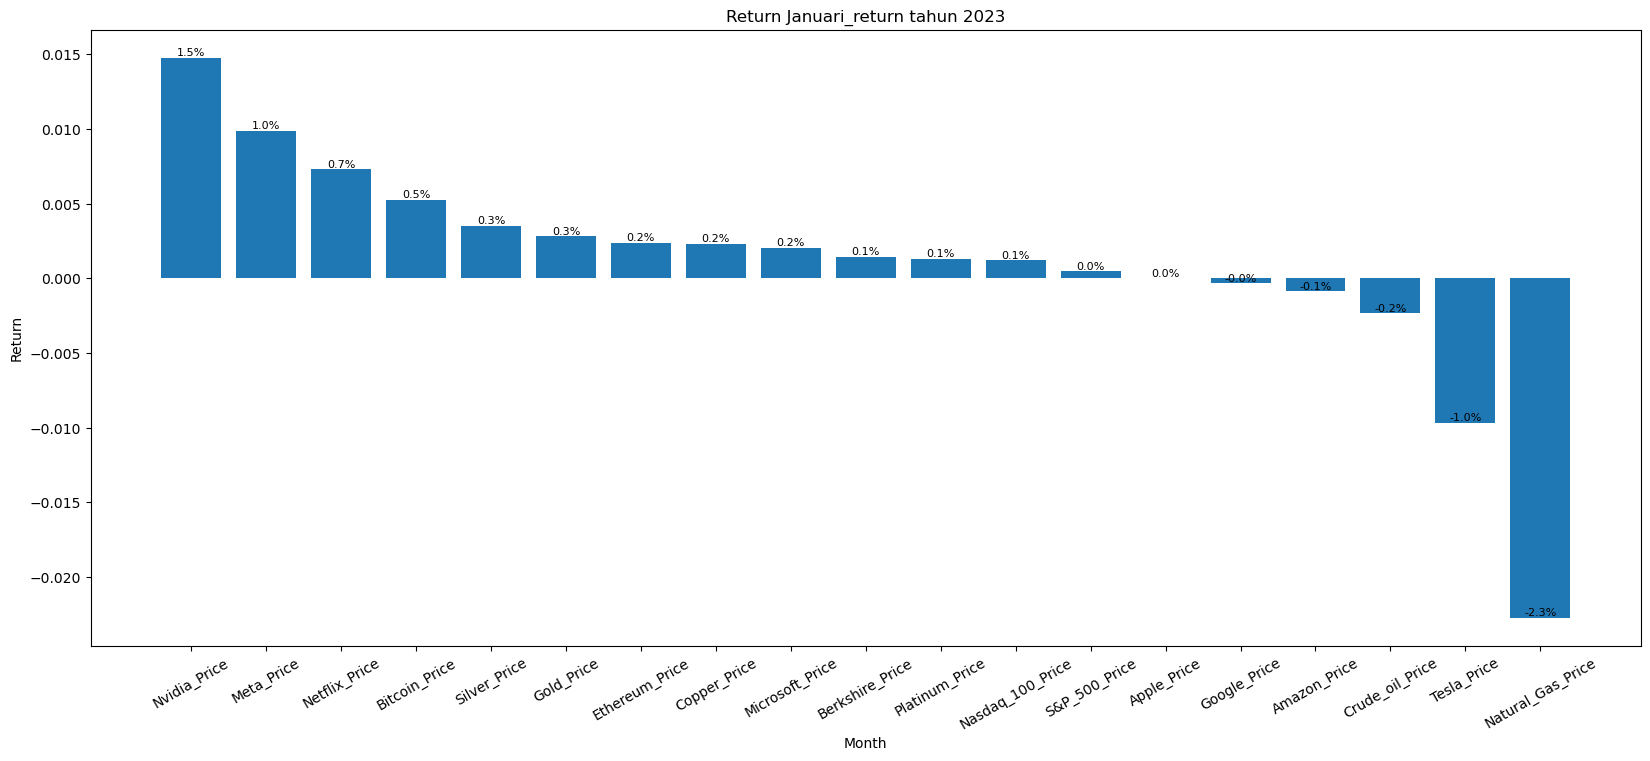

In [276]:
return_month('Januari_return', 2023)

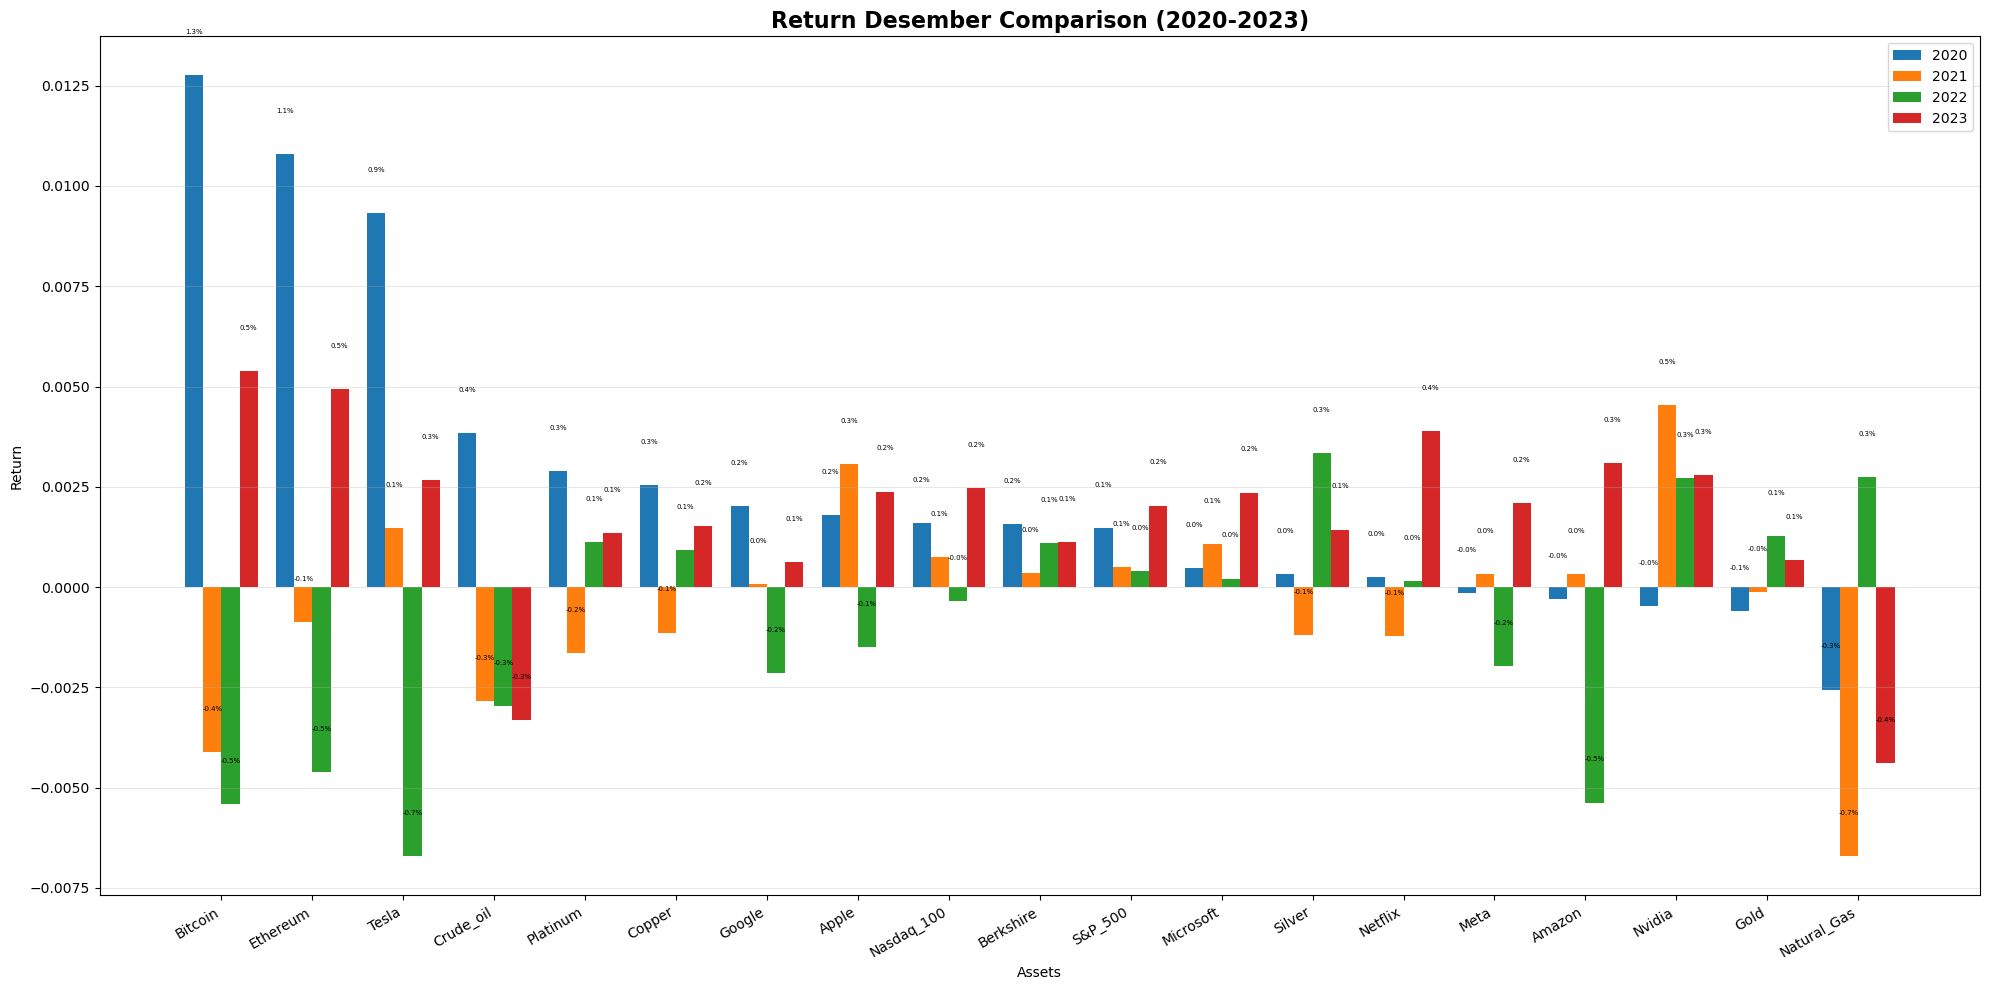

In [277]:
data = {}
bulan = 'Desember_return'
years = [2020, 2021, 2022, 2023]
for year in years:
  data_year = return_year(year)
  data[year] = data_year[bulan].sort_values(ascending=False)

assets = data[years[0]].index

x = np.arange(len(assets))
width = 0.2

plt.figure(figsize=(20, 10))

for i, year in enumerate(years):
  offset = (i - len(years)/2 + 0.5) * width
  values = [data[year][asset] for asset in assets]

  bars = plt.bar(x + offset, values, width, label=f'{year}')

  for j, value in enumerate(values):
    plt.text(x[j] + offset, value + 0.001, f'{value:.1%}', ha='center', va='bottom', fontsize=5)

plt.title(f"Return {bulan.replace('_return', '')} Comparison (2020-2023)", fontsize=16, fontweight='bold')
plt.xticks(x, [asset.replace('_Price', '') for asset in assets], rotation=30, ha='right')
plt.xlabel('Assets')
plt.ylabel('Return')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [278]:
def compare_year_return(month, assets):
  selected_assets = assets
  years = [2020, 2021, 2022, 2023]

  data = {}
  for asset in selected_assets:
    data[asset] = [return_year(year).loc[asset, month] for year in years]

  x = np.arange(len(years))
  width = 0.2

  fig, ax = plt.subplots(figsize=(20, 8))
  for i, (asset, value) in enumerate(data.items()):
    bars = ax.bar(x + i * width, value, width, label=asset.replace('_Price', ''))
    for bar, value in zip(bars, value):
      height = bar.get_height()
      ax.text(bar.get_x() + bar.get_width()/2, height, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

  ax.set_title(f"Return Comparation Bulan {month.replace('_return', ' ')}")
  ax.set_xticks(x + width * (len(selected_assets) - 1) / 2)
  ax.set_xticklabels(years)
  ax.set_xlabel('Year')
  ax.set_ylabel('Return')
  ax.legend()
  plt.show()

In [279]:
compare_year_return('Januari_return', ['Bitcoin_Price', 'Ethereum_Price', 'S&P_500_Price'])

# Portofolio analisis

In [ ]:
tahun = 2020
assets_pilihan = ['Bitcoin_Price', 'Tesla_Price', 'Apple_Price', 'Ethereum_Price']
jumlah_investasi = 1200

year_data = return_year(tahun)

returns_analisis = year_data.loc[assets_pilihan, ['Annualized_return']].copy()
returns_analisis = returns_analisis.sort_values('Annualized_return',ascending=False)
returns_analisis.reset_index(inplace=True)
returns_analisis.columns = ['Asset', 'Annualized_return']

positive_returns = returns_analisis[returns_analisis['Annualized_return'] > 0]

total_returns = positive_returns['Annualized_return'].sum()

positive_returns['Allocation_Pct'] = positive_returns['Annualized_return'] / total_returns
positive_returns['Allocation_USD'] = positive_returns['Allocation_Pct'] * jumlah_investasi
positive_returns['Expect_return'] = positive_returns['Allocation_USD'] * positive_returns['Annualized_return']
positive_returns['Profit'] = positive_returns['Expect_return'] - jumlah_investasi


In [ ]:
positive_returns

Asset  Annualized_return  Allocation_Pct  Allocation_USD  \
0     Tesla_Price          16.507005        0.420377      504.452655   
1  Ethereum_Price          12.542714        0.319420      383.304267   
2   Bitcoin_Price           7.218114        0.183821      220.584933   
3     Apple_Price           2.999293        0.076382       91.658145   

   Expect_return       Profit  
0    8327.002652  7127.002652  
1    4807.675943  3607.675943  
2    1592.207151   392.207151  
3     274.909664  -925.090336

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle(f"Portofolio {tahun}")

sizes = positive_returns['Allocation_Pct']

labels = []
for i, row in positive_returns.iterrows():
  asset = row['Asset']
  allocation_usd = row['Allocation_USD']
  labels.append(f"{asset} \n${allocation_usd:.0f}")

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})

for autotext in autotexts:
  autotext.set_color('white')

ax1.axis('equal')
ax1.set_title(f"Porpotion Return - {jumlah_investasi} USD")

returns_bar = positive_returns['Annualized_return']
ax2.bar(positive_returns['Asset'], returns_bar)
for i, value in enumerate(returns_bar):
  ax2.text(i, value, f'{value:.1%}', ha='center', va='bottom', fontsize=8)

ax2.set_title(f"Annualized Return")

plt.tight_layout()
plt.show()

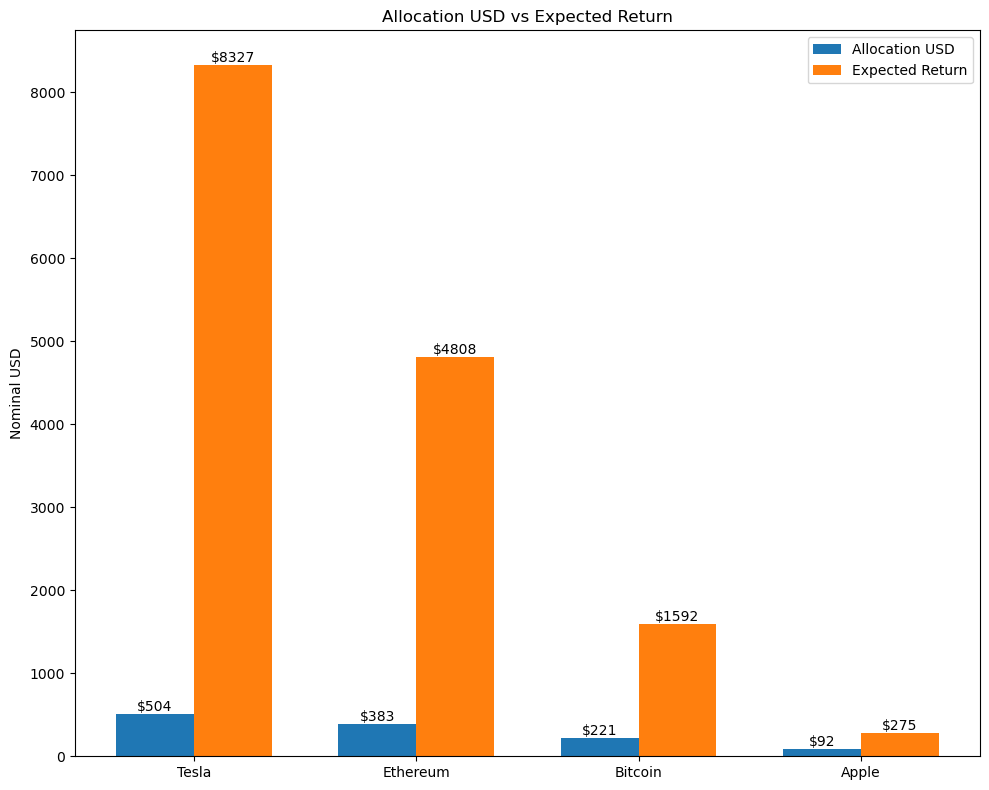

In [ ]:
assets = positive_returns['Asset'].str.replace('_Price', '')
expect_return = positive_returns['Expect_return']
allocated_usd = positive_returns['Allocation_USD']

x = np.arange(len(assets))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.bar(x - width/2, allocated_usd, width, label='Allocation USD')
bar2 = ax.bar(x + width/2, expect_return, width, label='Expected Return')

ax.set_title('Allocation USD vs Expected Return')

ax.set_ylabel('Nominal USD')
ax.set_xticks(x)
ax.set_xticklabels(assets)
ax.legend()

for i in bar1:
  height =  i.get_height()
  ax.text(i.get_x() + i.get_width()/2, height, f'${height:.0f}', ha='center', va='bottom', fontsize=10)

for i in bar2:
  height =  i.get_height()
  ax.text(i.get_x() + i.get_width()/2, height, f'${height:.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()